# Project - FMST - Credit Card Users Churn Prediction

## Background and Context

The Thera bank recently saw a steep decline in the number of users of their credit card, credit cards are a good source of income for banks because of different kinds of fees charged by the banks like annual fees, balance transfer fees, and cash advance fees, late payment fees, foreign transaction fees, and others. Some fees are charged to every user irrespective of usage, while others are charged under specified circumstances.

Customers’ leaving credit cards services would lead bank to loss, so the bank wants to analyze the data of customers and identify the customers who will leave their credit card services and reason for same – so that bank could improve upon those areas.

As a Data scientist at Thera bank we need to come up with a classification model that will help the bank improve its services so that customers do not renounce their credit cards.

We need to identify the best possible model that will give the required performance.

## Objective

1. Explore and visualize the dataset.
2. Build a classification model to predict if the customer is going to churn or not
3. Optimize the model using appropriate techniques
4. Generate a set of insights and recommendations that will help the bank


## Key Questions

1. What are the key factors influencing whether a customer will churn or renounce his or her credit card?
2. Is there a good predictive model so that we can address the customer attrition? 
3. What does the performance assessment look like for such a model?


## Data Dictionary

* CLIENTNUM: Client number. Unique identifier for the customer holding the account
* Attrition_Flag: Internal event (customer activity) variable - if the account is closed then "Attrited Customer" else "Existing Customer"
* Customer_Age: Age in Years
* Gender: Gender of the account holder
* Dependent_count: Number of dependents
* Education_Level:  Educational Qualification of the account holder - Graduate, High School, Unknown, Uneducated, College(refers to a college student), Post-Graduate, Doctorate.
* Marital_Status: Marital Status of the account holder
* Income_Category: Annual Income Category of the account holder
* Card_Category: Type of Card
* Months_on_book: Period of relationship with the bank
* Total_Relationship_Count: Total no. of products held by the customer
* Months_Inactive_12_mon: No. of months inactive in the last 12 months
* Contacts_Count_12_mon: No. of Contacts between the customer and bank in the last 12 months
* Credit_Limit: Credit Limit on the Credit Card
* Total_Revolving_Bal: The balance that carries over from one month to the next is the revolving balance
* Avg_Open_To_Buy: Open to Buy refers to the amount left on the credit card to use (Average of last 12 months)
* Total_Trans_Amt: Total Transaction Amount (Last 12 months)
* Total_Trans_Ct: Total Transaction Count (Last 12 months)
* Total_Ct_Chng_Q4_Q1: Ratio of the total transaction count in 4th quarter and the total transaction count in 1st quarter
* Total_Amt_Chng_Q4_Q1: Ratio of the total transaction amount in 4th quarter and the total transaction amount in 1st quarter
* Avg_Utilization_Ratio: Represents how much of the available credit the customer spent

## Import necessary libraries and load data

In [1]:
# Library to suppress warnings or deprecation notes 
import warnings
warnings.filterwarnings('ignore')

# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Removes the limit from the number of displayed columns and rows.
# This is so that we can see the entire dataframe when we print it
pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', None)
pd.set_option('display.max_rows', 200)
# We are setting the random seed via np.random.seed so that
# we get the same random results every time
np.random.seed(1)

In [2]:
df = pd.read_csv('BankChurners.csv')

In [3]:
# Take a copy of the data, do not modify the original data as we will need this during pipeline building
data = df.copy()

In [4]:
print(f'Number of rows: {data.shape[0]} and number of columns: {data.shape[1]}')

Number of rows: 10127 and number of columns: 21


In [5]:
# Check the first 5 rows of data
data.head()

CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
0  768805383  Existing Customer            45      M                3   
1  818770008  Existing Customer            49      F                5   
2  713982108  Existing Customer            51      M                3   
3  769911858  Existing Customer            40      F                4   
4  709106358  Existing Customer            40      M                3   

  Education_Level Marital_Status Income_Category Card_Category  \
0     High School        Married     $60K - $80K          Blue   
1        Graduate         Single  Less than $40K          Blue   
2        Graduate        Married    $80K - $120K          Blue   
3     High School            NaN  Less than $40K          Blue   
4      Uneducated        Married     $60K - $80K          Blue   

   Months_on_book  Total_Relationship_Count  Months_Inactive_12_mon  \
0              39                         5                       1   
1              44                         6                       1   
2              36                         4                       1   
3              34                         3                       4   
4              21                         5                       1   

   Contacts_Count_12_mon  Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  \
0                      3       12691.0                  777          11914.0   
1                      2        8256.0                  864           7392.0   
2                      0        3418.0                    0           3418.0   
3                      1        3313.0                 2517            796.0   
4                      0        4716.0                    0           4716.0   

   Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  \
0                 1.335             1144              42                1.625   
1                 1.541             1291              33                3.714   
2                 2.594             1887              20                2.333   
3                 1.405             1171              20                2.333   
4                 2.175              816              28                2.500   

   Avg_Utilization_Ratio  
0                  0.061  
1                  0.105  
2                  0.000  
3                  0.760  
4                  0.000

In [6]:
# Check the last 5 rows of data
data.tail()

CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
10122  772366833  Existing Customer            50      M                2   
10123  710638233  Attrited Customer            41      M                2   
10124  716506083  Attrited Customer            44      F                1   
10125  717406983  Attrited Customer            30      M                2   
10126  714337233  Attrited Customer            43      F                2   

      Education_Level Marital_Status Income_Category Card_Category  \
10122        Graduate         Single     $40K - $60K          Blue   
10123             NaN       Divorced     $40K - $60K          Blue   
10124     High School        Married  Less than $40K          Blue   
10125        Graduate            NaN     $40K - $60K          Blue   
10126        Graduate        Married  Less than $40K        Silver   

       Months_on_book  Total_Relationship_Count  Months_Inactive_12_mon  \
10122              40                         3                       2   
10123              25                         4                       2   
10124              36                         5                       3   
10125              36                         4                       3   
10126              25                         6                       2   

       Contacts_Count_12_mon  Credit_Limit  Total_Revolving_Bal  \
10122                      3        4003.0                 1851   
10123                      3        4277.0                 2186   
10124                      4        5409.0                    0   
10125                      3        5281.0                    0   
10126                      4       10388.0                 1961   

       Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  \
10122           2152.0                 0.703            15476             117   
10123           2091.0                 0.804             8764              69   
10124           5409.0                 0.819            10291              60   
10125           5281.0                 0.535             8395              62   
10126           8427.0                 0.703            10294              61   

       Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  
10122                0.857                  0.462  
10123                0.683                  0.511  
10124                0.818                  0.000  
10125                0.722                  0.000  
10126                0.649                  0.189

In [7]:
# checking column names, datatypes and number of non-null values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           8608 non-null   object 
 6   Marital_Status            9378 non-null   object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

> **Observations:**
> * CLIENTNUM column can be dropped as it is a unique number and does not contain any useful information.
> * There are null or missing values in the data for Education_Level and Marital_Status columns.
> * Both numerical and object data type columns are present in the dataset.

In [8]:
# Drop the CLIENTNUM column from the working dataset
data.drop(['CLIENTNUM'], axis=1, inplace=True)

In [9]:
# Checking for duplicate rows.
data.duplicated().sum()

0

In [10]:
data.isnull().sum()

Attrition_Flag                 0
Customer_Age                   0
Gender                         0
Dependent_count                0
Education_Level             1519
Marital_Status               749
Income_Category                0
Card_Category                  0
Months_on_book                 0
Total_Relationship_Count       0
Months_Inactive_12_mon         0
Contacts_Count_12_mon          0
Credit_Limit                   0
Total_Revolving_Bal            0
Avg_Open_To_Buy                0
Total_Amt_Chng_Q4_Q1           0
Total_Trans_Amt                0
Total_Trans_Ct                 0
Total_Ct_Chng_Q4_Q1            0
Avg_Utilization_Ratio          0
dtype: int64

> **Observations:**
> * Education_Level has 1519 missing values.
> * Marital_Status has 749 missing values.
> * Rest of the columns have no null values but we will check if there are any wrong or missing values.

In [11]:
# Check the Summary of the data for numerical columns
data.describe().T

count         mean          std     min       25%  \
Customer_Age              10127.0    46.325960     8.016814    26.0    41.000   
Dependent_count           10127.0     2.346203     1.298908     0.0     1.000   
Months_on_book            10127.0    35.928409     7.986416    13.0    31.000   
Total_Relationship_Count  10127.0     3.812580     1.554408     1.0     3.000   
Months_Inactive_12_mon    10127.0     2.341167     1.010622     0.0     2.000   
Contacts_Count_12_mon     10127.0     2.455317     1.106225     0.0     2.000   
Credit_Limit              10127.0  8631.953698  9088.776650  1438.3  2555.000   
Total_Revolving_Bal       10127.0  1162.814061   814.987335     0.0   359.000   
Avg_Open_To_Buy           10127.0  7469.139637  9090.685324     3.0  1324.500   
Total_Amt_Chng_Q4_Q1      10127.0     0.759941     0.219207     0.0     0.631   
Total_Trans_Amt           10127.0  4404.086304  3397.129254   510.0  2155.500   
Total_Trans_Ct            10127.0    64.858695    23.472570    10.0    45.000   
Total_Ct_Chng_Q4_Q1       10127.0     0.712222     0.238086     0.0     0.582   
Avg_Utilization_Ratio     10127.0     0.274894     0.275691     0.0     0.023   

                               50%        75%        max  
Customer_Age                46.000     52.000     73.000  
Dependent_count              2.000      3.000      5.000  
Months_on_book              36.000     40.000     56.000  
Total_Relationship_Count     4.000      5.000      6.000  
Months_Inactive_12_mon       2.000      3.000      6.000  
Contacts_Count_12_mon        2.000      3.000      6.000  
Credit_Limit              4549.000  11067.500  34516.000  
Total_Revolving_Bal       1276.000   1784.000   2517.000  
Avg_Open_To_Buy           3474.000   9859.000  34516.000  
Total_Amt_Chng_Q4_Q1         0.736      0.859      3.397  
Total_Trans_Amt           3899.000   4741.000  18484.000  
Total_Trans_Ct              67.000     81.000    139.000  
Total_Ct_Chng_Q4_Q1          0.702      0.818      3.714  
Avg_Utilization_Ratio        0.176      0.503      0.999

> **Observations:**
> * *Customer_Age*: Customer age varies from 26 to 73 years. With 75% customers are within 52 and median of 46 years.
> * *Dependent_count*: Minimum of 0 and maximum of 5 dependents. Data looks good with median of 2 dependents.
> * *Months_on_book*: Month on book ranges from 13 to 56 months. This range seems practical and makes sense.
> * *Total_Relationship_Count*: Number of products held by customer are from 1 to 6. Majority of customers have more than one product with median of 4 products.
> * *Months_Inactive_12_mon*: Inactivity ranges from 2 months to six months. This data looks good.
> * *Contacts_Count_12_mon*: Number of contacts between customer and bank ranges from 0 to 6 times in last 12 months. This seems reasonable with average of 2 contacts.
> * *Credit_Limit*: Credit limit of customers ranges from 1438 to 34516. The median credit limit is little over 4500.
> * *Total_Revolving_Bal*: Total revolving balance is also looking good with min 359 and max 2517 with mean of 1163.
> * *Avg_Open_To_Buy*: This feature is closely related to credit limit it seems. Max value 34516 and min of 0.
> * *Total_Trans_Amt*: In last 12 months total transactions amount varies from 510 to 18484 with median of 3899.
> * *Total_Trans_Ct*: Min of 10 and max of 139. Looks good, it should be related to the Total_Trans_Amt.
> * *Total_Amt_Chng_Q4_Q1*: Min of 0 and max of 3.4. But it seems most of the customers spent less in Q4 than in Q1. 
> * *Total_Ct_Chng_Q4_Q1*: Similar to amount with min of 0 and max of 3.7. Again it seems most of the customers swipped their credit cards less in Q4 than in Q1.
> * *Avg_Utilization_Ratio*: Nothing ubnormal with min of 0 and max of 0.999. 75% customers have used only upto 50% of their credit limit.

Let's check the summary of other categorical variables, including the null values if any.

In [12]:
cat_cols = data.select_dtypes(include=["object", "category"]).columns
for col in cat_cols:
    print('>> Domain of: ', col)
    print('-------------------------------')
    cat = data[col].value_counts(dropna=False).sort_values(ascending=False)
    print(cat)
    print('-------------------------------\n')

>> Domain of:  Attrition_Flag
-------------------------------
Existing Customer    8500
Attrited Customer    1627
Name: Attrition_Flag, dtype: int64
-------------------------------

>> Domain of:  Gender
-------------------------------
F    5358
M    4769
Name: Gender, dtype: int64
-------------------------------

>> Domain of:  Education_Level
-------------------------------
Graduate         3128
High School      2013
NaN              1519
Uneducated       1487
College          1013
Post-Graduate     516
Doctorate         451
Name: Education_Level, dtype: int64
-------------------------------

>> Domain of:  Marital_Status
-------------------------------
Married     4687
Single      3943
NaN          749
Divorced     748
Name: Marital_Status, dtype: int64
-------------------------------

>> Domain of:  Income_Category
-------------------------------
Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
abc               1112
$120K +            727

> **Observations:**
> * *Attrition_Flag*: This is the target variable has only two values. Attrited Customer are far less than Esixting Customer. We have an unbalanced dataset.
> * *Gender*: Consists of two values with F being most frequent.
> * *Education_Level*: There are six education levels but we see 1519 about 10% as null. We would impute this with mode value which is Graduate.
> * *Marital_Status*: Three different values with mode Married. There are 749 null values. We would impute this with mode value which is Married.
> * *Income_Category*: There are five income categories but it seems there is wrong value 'abc'. Again this will be relaced with mode.
> * *Card_Category*: Card categories look good with 4 different products. Most of the customers have Blue cards.

## Univariate Analysis

Let's check the distribution of each feature and comment on the feature distribution as necessary. For this purpose we define the below functions to analyze the nemerical and categorical type of values effectively.

In [13]:
# function to plot a boxplot and a histogram along the same scale.
def box_hist_plot(data, feature, figsize=(12, 7), bins=20):
    """
    This will show a box and hist plot in a column alignment, For hist plot kde is set to True

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    """
    # creating the 2 subplots
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  
    # boxplot will be created and a star will indicate the mean value of the column
    sns.boxplot(data=data, x=feature, ax=ax_box2, showmeans=True, color="violet")  
    # For hist plot
    sns.histplot(data=data, x=feature, kde=True, bins=bins, ax=ax_hist2) 
    # Add mean to the histogram
    ax_hist2.axvline(data[feature].mean(), color="green", linestyle="--") 
    # Add median to the histogram
    ax_hist2.axvline(data[feature].median(), color="black", linestyle="-")  

In [14]:
# function to create bar plot with percent labels
def bar_perc_plot(data, feature):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    """

    # calculate the fig width dynamically
    total = len(data[feature]) 
    count = data[feature].nunique()
    plt.figure(figsize=(count + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        # Sort the bars from high to low
        order=data[feature].value_counts().sort_values(ascending=False).index,
    )

    for bar in ax.patches:
        # percentage of each class of the category
        label = "{:.2f}%".format(100 * bar.get_height() / total)  
        x = bar.get_x() + bar.get_width() / 2  # width of the plot
        y = bar.get_height()  # height of the plot

        # annotate the percentage
        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        ) 

    plt.show();  # show the plot

### Analysis of Customer_Age

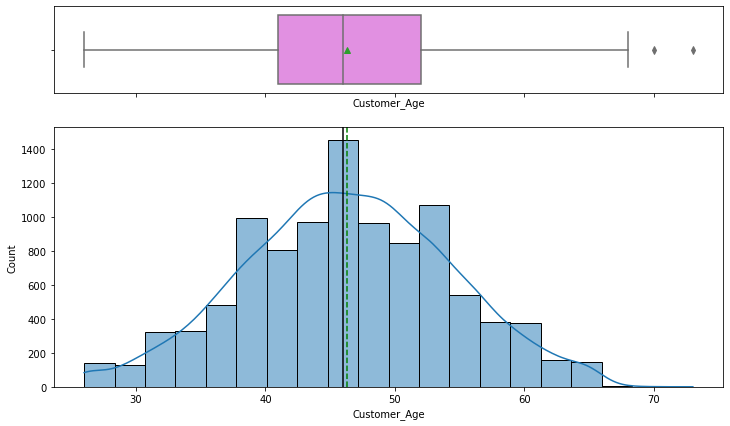

In [15]:
box_hist_plot(data, 'Customer_Age')

### Analysis of Months_on_book

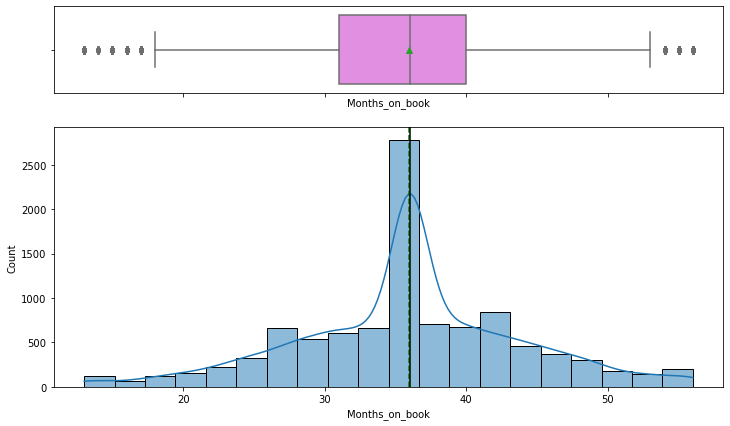

In [16]:
box_hist_plot(data, 'Months_on_book')

> **Observations:**
> * Customer Age and Months on book data are normally distributed with central tendency and with few outliers.
> * Outliers for customer age are above 65 years and within 73 years. Which are within acceptable range.
> * Similarly outliers of Months on book are also within acceptable ranges and we do not need to treat them.

### Analysis of Total_Revolving_Bal

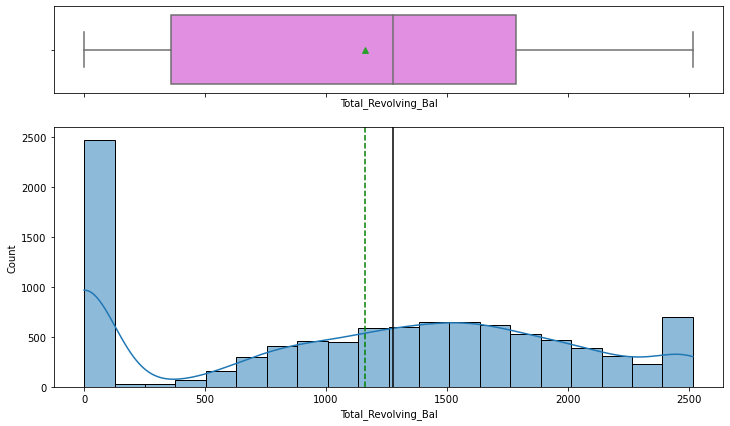

In [17]:
box_hist_plot(data, 'Total_Revolving_Bal')

> **Observations:**
> * Most of the customers have very low Total revolving balance. 
> * It seems data distribution is an overlap of multiple distributions, especially towards the lower and higher ends of the distribution causing mean to be smaller than median.
> * There are no outliers in the data.

### Analysis of Credit_Limit

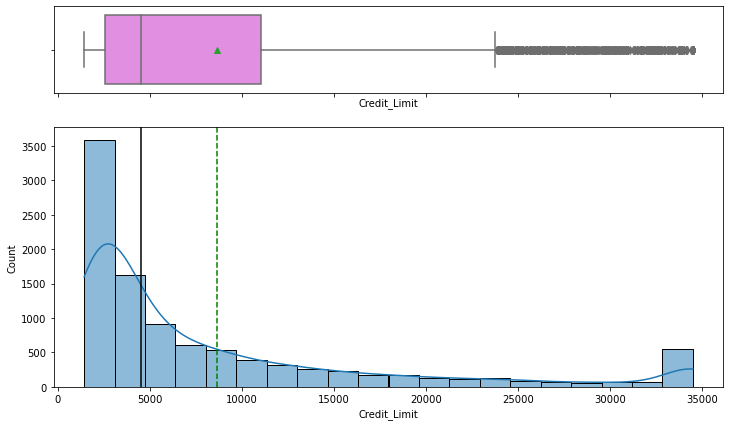

In [18]:
box_hist_plot(data, 'Credit_Limit')

### Analysis of Avg_Open_To_Buy

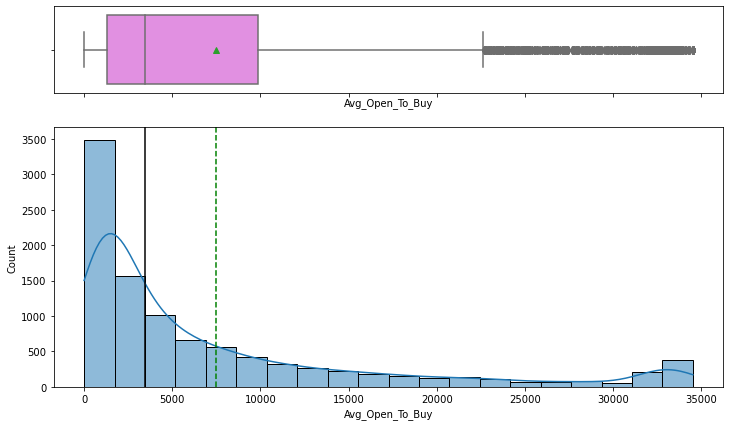

In [19]:
box_hist_plot(data, 'Avg_Open_To_Buy')

> **Observations:**
> * Credit limit and Avg open to buy are smililar and normally distributed but right skewed. Median is much less than mean. Again this could be due to multiple overlapping Gaussians. 
> * There are many outliers on the right but it is not uncommon to have credit limit or remaining balance as 35K. Hence these could be valid values in the dataset.
> * During model building, StandardScaler will be applied to reduce the range of values.

### Analysis of Total_Ct_Chng_Q4_Q1

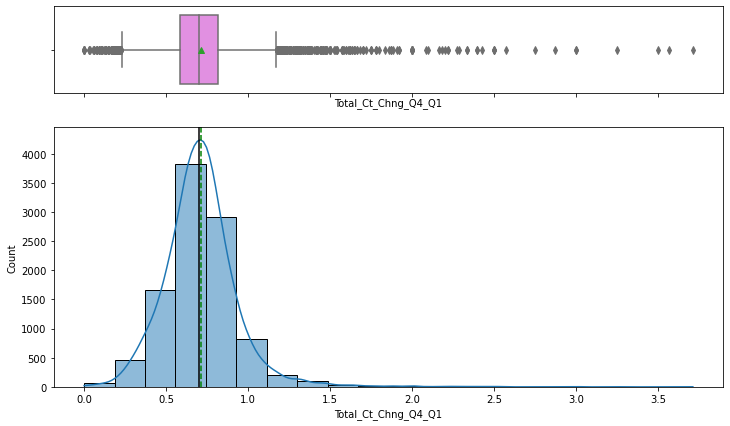

In [20]:
box_hist_plot(data, 'Total_Ct_Chng_Q4_Q1')

### Analysis of Total_Amt_Chng_Q4_Q1

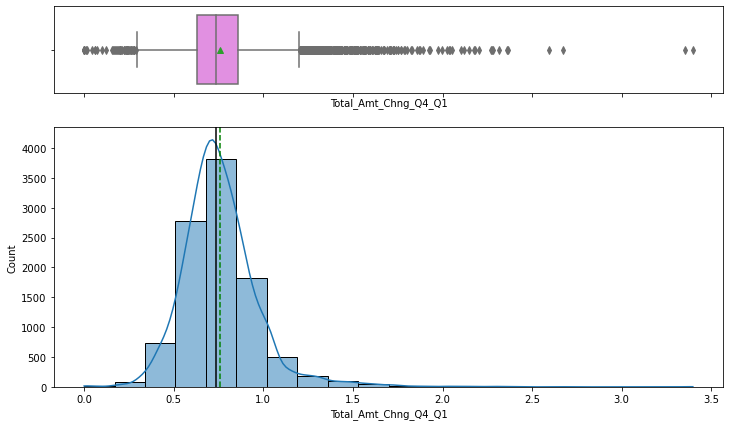

In [21]:
box_hist_plot(data, 'Total_Amt_Chng_Q4_Q1')

> **Observations:**
> * Ratios of transactions count and amount between Q4 and Q1 are also having similar normal distributions with high right skew. Although mean and median are not too far apart.  
> * There are many outliers on both sides but it is not uncommon to have 0 or 3.5 times more amount or count between Q4 to Q1. We do not see any need to treat these outliers.

### Analysis of Avg_Utilization_Ratio

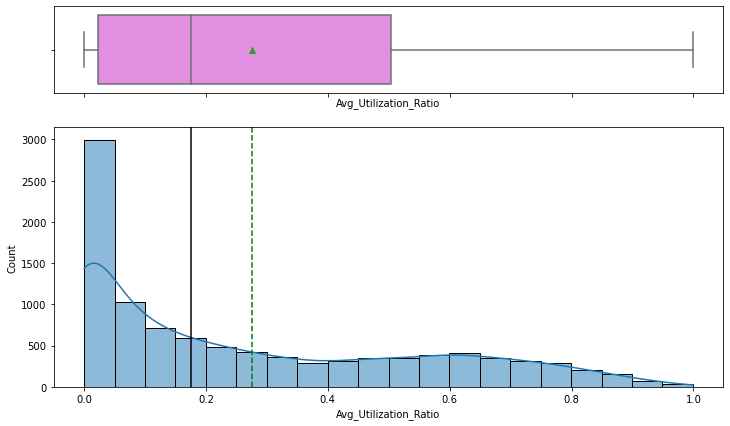

In [22]:
box_hist_plot(data, 'Avg_Utilization_Ratio')

> **Observations:**
> * Avg utilization ratio is a higly right skewed distribution and median is less than mean.  
> * There are no outliers in the data.
> * Most of the customers have very low utilization of their credit limit.

### Analysis of Total_Trans_Ct

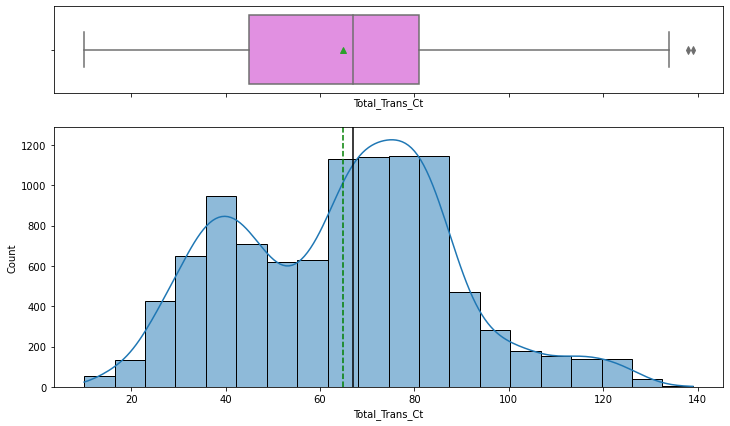

In [23]:
box_hist_plot(data, 'Total_Trans_Ct')

### Analysis of Total_Trans_Amt

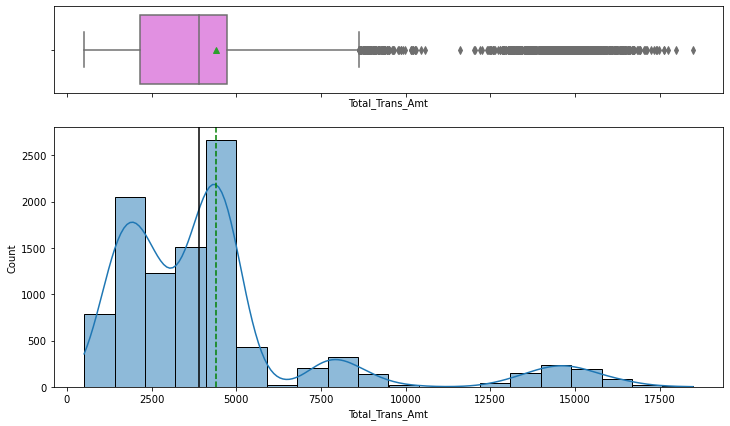

In [24]:
box_hist_plot(data, 'Total_Trans_Amt')

> **Observations:**
> * Total Transactions amount and count clearly shows multiple Gaussians, hence we see multiple normal distributions side by side.  
> * There are many outliers for the amount on the right side but these could be due to multiple customer data segments.
> * The high values of transactions count (140) and amount (175K) are not uncommon. Hence we do not see any need for outlier treatment.
> * StandardScaler will be applied to reduce the range of values during model building.

### Analysis of Dependent_count

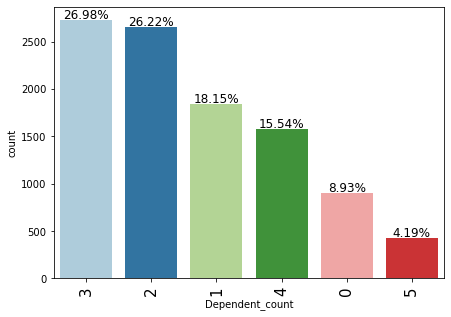

In [25]:
bar_perc_plot(data, 'Dependent_count')

> **Observations:**
> * Over 50% of customers have 2 or 3 dependents.  
> * About 4% have 5 dependents and 9% are having no dependents.

### Analysis of Total_Relationship_Count

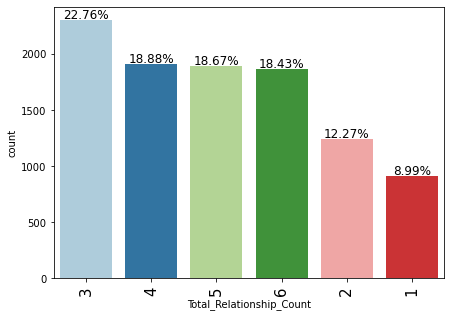

In [26]:
bar_perc_plot(data, 'Total_Relationship_Count')

> **Observations:**
> * Over 22% of customers have 3 products from the bank.  
> * Almost equal number of customers (18-19% around) have 4,5 or 6 products.
> * Only 9% customers are having one product with bank.

### Analysis of Months_Inactive_12_mon

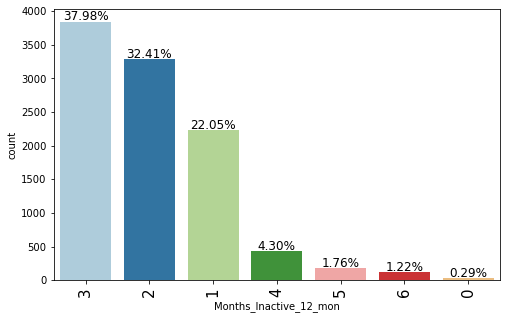

In [27]:
bar_perc_plot(data, 'Months_Inactive_12_mon')

> **Observations:**
> * Allmost all customers were inactive between 1 to 6 months of the year.  
> * Around 70% of customers were inactive for 2 to 3 months in the year.
> * This is inline with the average utilization ratio, being inactive reduces the utilization ratio.

### Analysis of Contacts_Count_12_mon

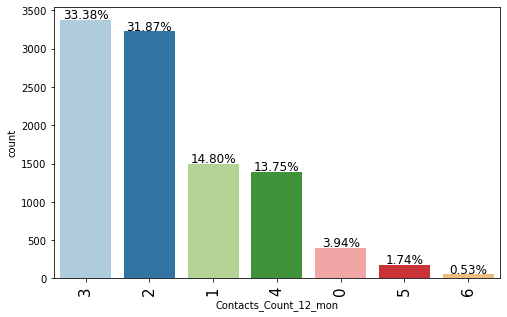

In [28]:
bar_perc_plot(data, 'Contacts_Count_12_mon')

> **Observations:**
> * Around 65% of customers have 2 or 3 contacts with bank in last 12 months.  
> * About 4% have are not in contact with bank.

### Analysis of Gender

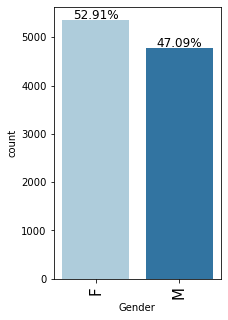

In [29]:
bar_perc_plot(data, 'Gender')

> **Observations:**
> * Around 53% are Female customers.  
> * Around 47% are Male customers.

### Analysis of Education_Level

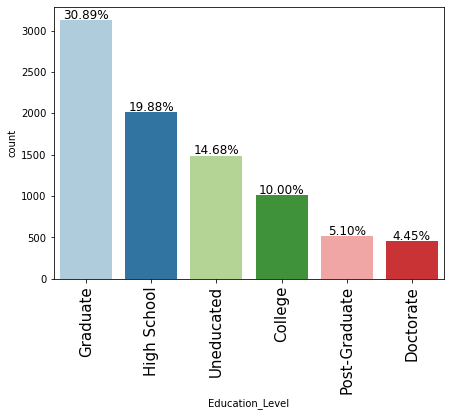

In [30]:
bar_perc_plot(data, 'Education_Level')

> **Observations:**
> * Close to one third of customers are Graduate. 
> * Around 15% are Uneducated
> * About 10% have Post-Graduate and Doctorate degrees.
> * Education_Level had Null values, which will be imputed with Graduate 

### Analysis of Marital_Status

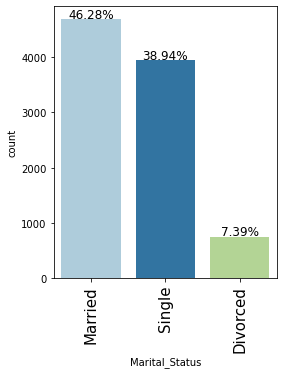

In [31]:
bar_perc_plot(data, 'Marital_Status')

> **Observations:**
> * Majority of the customers are Married followed by Single.  
> * A little more than 7% are Divorced.
> * Marital_Status had Null values, which will be imputed with Married

### Analysis of Income_Category

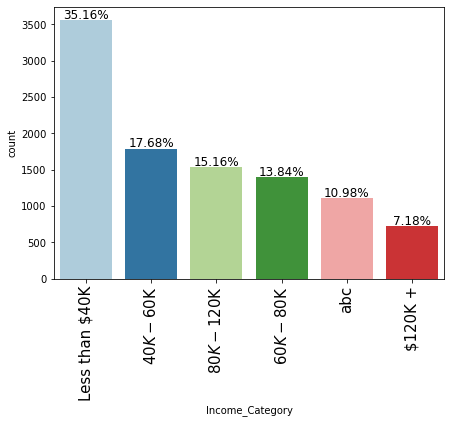

In [32]:
bar_perc_plot(data, 'Income_Category')

> **Observations:**
> * Customers earning less than 40K stands out at around 35%  
> * It seems there is a missing range from 80K to 120K

There is an invalid category 'abc' which can be those missing ranges but let's check a sample of the data where Income_Category is 'abc'. 

In [33]:
data[data['Income_Category']=='abc'].sample(10)

Attrition_Flag  Customer_Age Gender  Dependent_count Education_Level  \
3407  Existing Customer            44      F                4      Uneducated   
6683  Existing Customer            46      F                2        Graduate   
1455  Existing Customer            39      F                2       Doctorate   
6611  Existing Customer            36      F                2      Uneducated   
7770  Attrited Customer            37      M                2      Uneducated   
2469  Existing Customer            54      F                1       Doctorate   
6921  Existing Customer            41      F                4     High School   
7727  Attrited Customer            44      F                4      Uneducated   
2248  Existing Customer            37      M                1        Graduate   
1504  Existing Customer            49      F                5        Graduate   

     Marital_Status Income_Category Card_Category  Months_on_book  \
3407        Married             abc          Blue              38   
6683         Single             abc          Blue              36   
1455        Married             abc          Blue              36   
6611       Divorced             abc          Blue              36   
7770         Single             abc          Blue              24   
2469         Single             abc          Blue              36   
6921        Married             abc          Blue              30   
7727         Single             abc          Blue              36   
2248         Single             abc          Blue              32   
1504       Divorced             abc          Blue              35   

      Total_Relationship_Count  Months_Inactive_12_mon  Contacts_Count_12_mon  \
3407                         6                       1                      2   
6683                         4                       6                      2   
1455                         5                       2                      4   
6611                         3                       2                      1   
7770                         2                       2                      3   
2469                         6                       3                      4   
6921                         5                       2                      2   
7727                         3                       3                      4   
2248                         4                       1                      3   
1504                         6                       3                      4   

      Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  \
3407        5366.0                  968           4398.0   
6683        2042.0                 1359            683.0   
1455        8058.0                  791           7267.0   
6611       14304.0                  699          13605.0   
7770        1649.0                    0           1649.0   
2469       26053.0                  829          25224.0   
6921        9139.0                 1620           7519.0   
7727        8075.0                  317           7758.0   
2248        4397.0                 2007           2390.0   
1504        2561.0                    0           2561.0   

      Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  \
3407                 0.992             4558              56   
6683                 0.796             4917              73   
1455                 1.787             2742              42   
6611                 0.549             4746              73   
7770                 0.864             2574              51   
2469                 0.669             2768              70   
6921                 0.773             4675              78   
7727                 0.585             2415              41   
2248                 0.892             2473              47   
1504                 1.021             2047              41   

      Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  
3407                0.750                  0.180  
6683    

Looking at the sample data it seems there is no pattern as such. We see Income_Category 'abc' has different Education_Level, Credit_Limit or Total_Trans_Amt etc. We cannot conclude with 100% confidence that 'abc' is the missing ranges. Hence due to lack of other information 'abc' will be imputed with mode value.

### Analysis of Card_Category

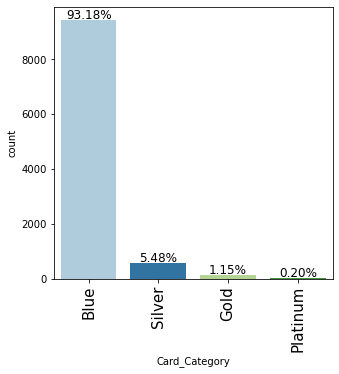

In [34]:
bar_perc_plot(data, 'Card_Category')

> **Observations:**
> * Over 93% of customers have the Blue card. This seems very popular card with customers.  
> * There are not many customers for high end credit cards such as Gold or Platimum.

### Analysis of Attrition_Flag

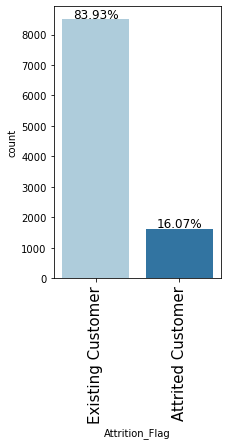

In [35]:
bar_perc_plot(data, 'Attrition_Flag')

> **Observations:**
> * This is the target variable. Around 16% customers have closed their card account.  
> * Around 84% customers are in good standing.
> * From modelling perspective, we have an unbalanced classification.

## Multi-Variate Analysis

### Distribution of Customer Attrition with Non-Categorical features

Ignoring the outliers let's check the distribution of Attrited Customers based on the non-categorical features

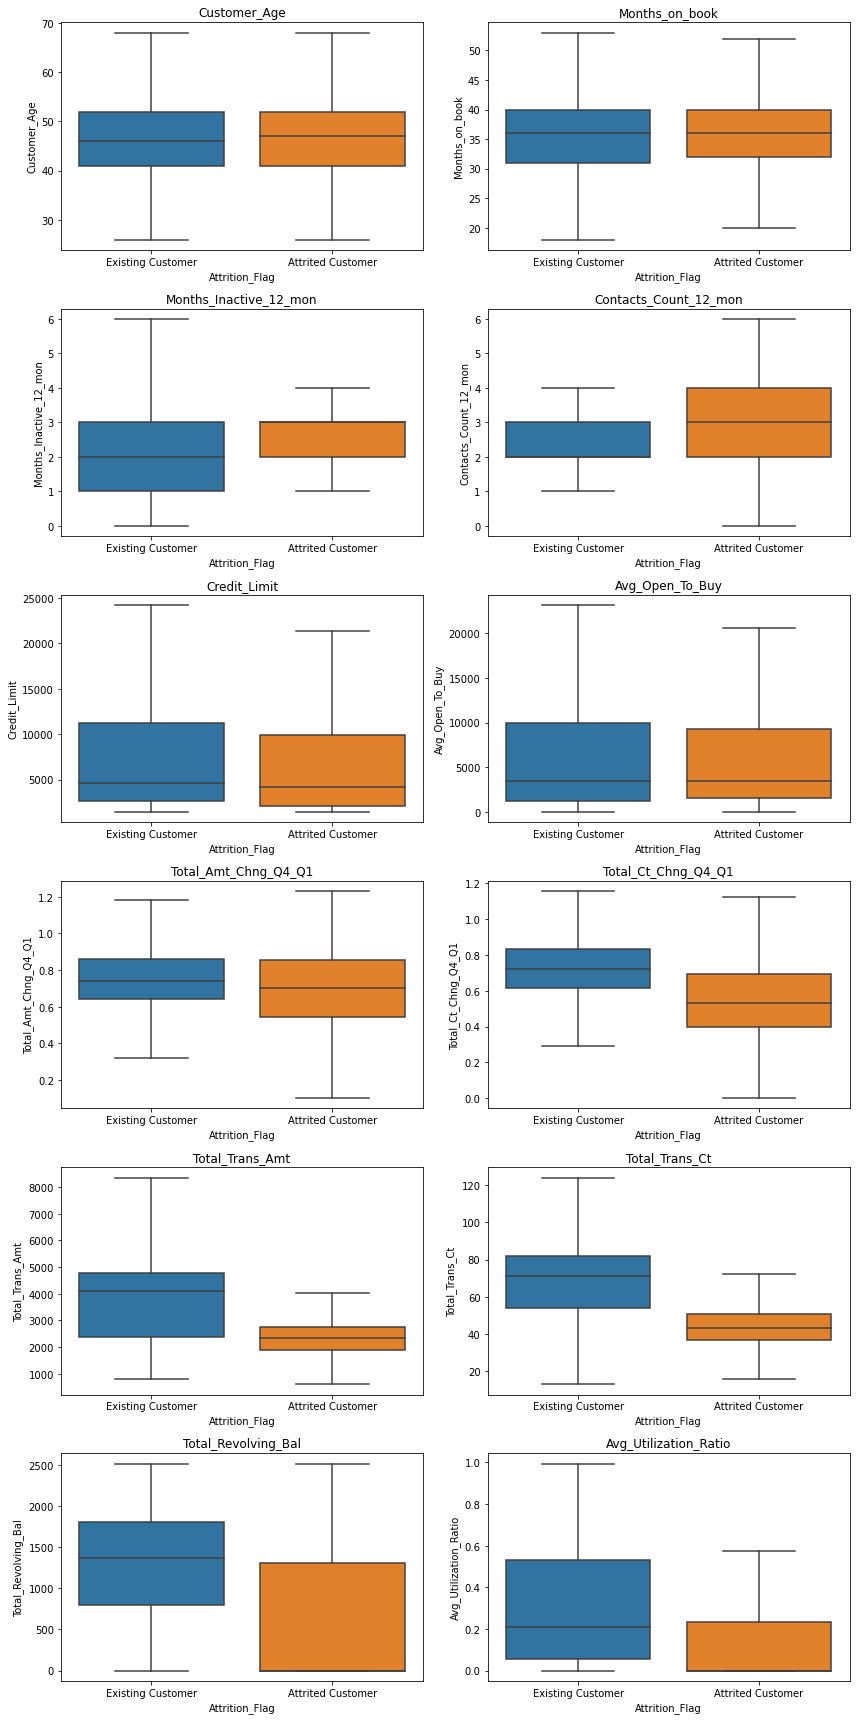

In [36]:
cols = [
        "Customer_Age",
        "Months_on_book",
        "Months_Inactive_12_mon",
        "Contacts_Count_12_mon",
        "Credit_Limit",
        "Avg_Open_To_Buy",
        "Total_Amt_Chng_Q4_Q1",
        "Total_Ct_Chng_Q4_Q1",
        "Total_Trans_Amt",
        "Total_Trans_Ct",
        "Total_Revolving_Bal",
        "Avg_Utilization_Ratio"
    ]
plt.figure(figsize=(12, 24))

for i, variable in enumerate(cols):
    plt.subplot(6, 2, i + 1)
    sns.boxplot(data = data, x="Attrition_Flag", y=variable, showfliers=False)
    plt.tight_layout()
    plt.title(variable)
plt.show()

> **Observations:**
> * *Customer_Age and Months on book*: Existing or Attrited customers with regards to these features are mostly same, although Attrited customers have little higher median.
> * *Months_Inactive_12_mon*: Customers with 2 to 3 months of inactivity have churned more than other customers.
> * *Contacts_Count_12_mon*: Customers who have given up their account have more contact points with Bank in general than Existing customers.
> * *Credit_Limit and Avg_Open_To_Buy*: Customers with comparatively lower credit limit or Avg_Open_To_Buy have attrited more than the existing customers.
> * *Total_Amt_Chng_Q4_Q1 and Total_Ct_Chng_Q4_Q1*: Customers with lower ratios of Transactions count and amount with Q4 and Q1 have dropped off more.
> * *Total_Trans_Amt and Total_Trans_Ct*: Again there is a strong evidence that Customers with lower total transactions count and amount have given up their credit cards, compared to existing customers.
> * *Total_Revolving_Bal*: Low Total_Revolving_Bal balance seems to be driving factor for customer attrition.
> * *Avg_Utilization_Ratio*: Attrited customers mostly have lower average utilization ratio. 

### Distribution of Customer Attrition with Categorical features

Now let's check the distribution of Customer Attrition with regards to categorical values.

In [37]:
# function to count and a normalized stack bar chart
def count_and_normalize_plot(data, predictor, target):
    """
    Print the category counts and plot a normalized stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 100)
    
    fig = plt.figure(figsize=(14,5))
    
    # Add the first plot
    ax1 = fig.add_subplot(121)
    ax1.set_title(predictor + ' by ' + target)
    sns.countplot(data = data, x=target, hue=predictor, ax=ax1)

    # Add the second plot
    ax2 = fig.add_subplot(122)
    ax2.set_title('Normalized ' + predictor + ' by ' + target)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, ax=ax2)
    plt.legend(
        loc="lower left",
        frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

Attrition_Flag  Attrited Customer  Existing Customer    All
Gender                                                     
All                          1627               8500  10127
F                             930               4428   5358
M                             697               4072   4769
----------------------------------------------------------------------------------------------------


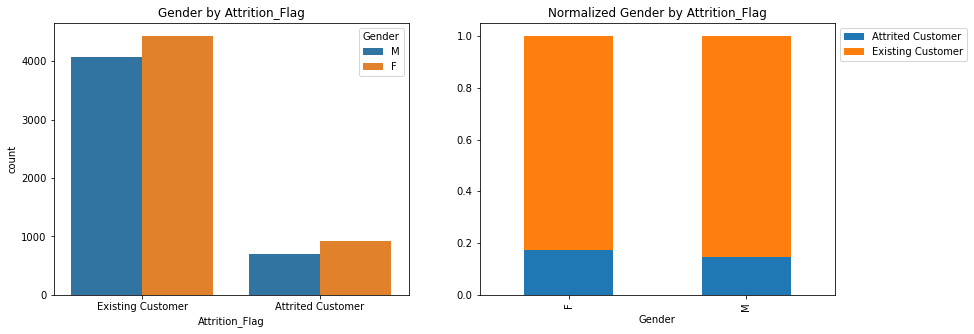

In [38]:
count_and_normalize_plot(data, 'Gender', 'Attrition_Flag')

Attrition_Flag   Attrited Customer  Existing Customer    All
Dependent_count                                             
All                           1627               8500  10127
3                              482               2250   2732
2                              417               2238   2655
1                              269               1569   1838
4                              260               1314   1574
0                              135                769    904
5                               64                360    424
----------------------------------------------------------------------------------------------------


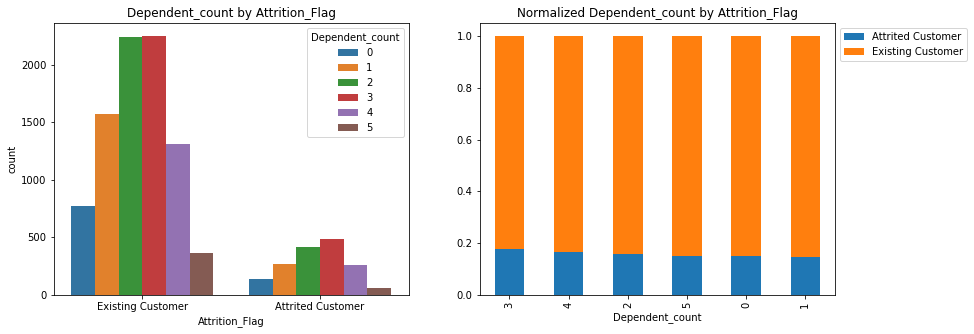

In [39]:
count_and_normalize_plot(data, 'Dependent_count', 'Attrition_Flag')

Attrition_Flag   Attrited Customer  Existing Customer   All
Education_Level                                            
All                           1371               7237  8608
Graduate                       487               2641  3128
High School                    306               1707  2013
Uneducated                     237               1250  1487
College                        154                859  1013
Doctorate                       95                356   451
Post-Graduate                   92                424   516
----------------------------------------------------------------------------------------------------


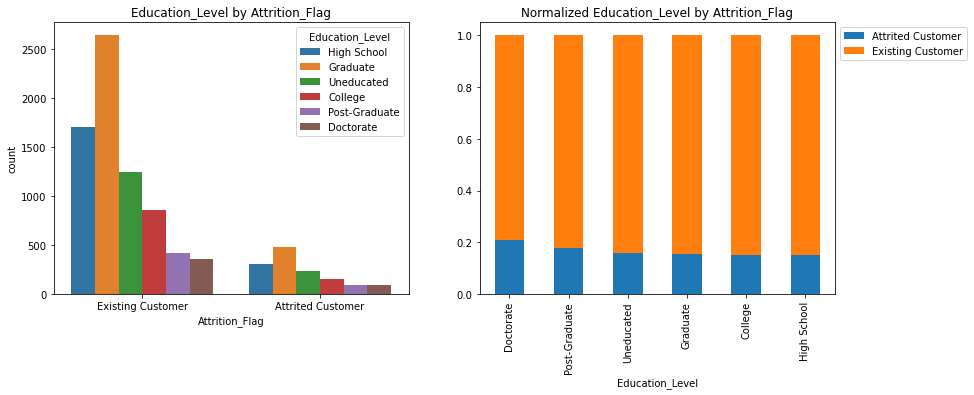

In [40]:
count_and_normalize_plot(data, 'Education_Level', 'Attrition_Flag')

Attrition_Flag  Attrited Customer  Existing Customer   All
Marital_Status                                            
All                          1498               7880  9378
Married                       709               3978  4687
Single                        668               3275  3943
Divorced                      121                627   748
----------------------------------------------------------------------------------------------------


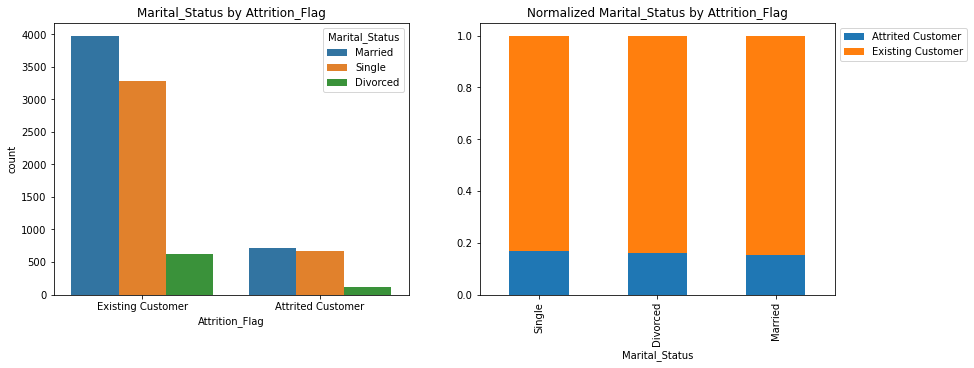

In [41]:
count_and_normalize_plot(data, 'Marital_Status', 'Attrition_Flag')

Attrition_Flag   Attrited Customer  Existing Customer    All
Income_Category                                             
All                           1627               8500  10127
Less than $40K                 612               2949   3561
$40K - $60K                    271               1519   1790
$80K - $120K                   242               1293   1535
$60K - $80K                    189               1213   1402
abc                            187                925   1112
$120K +                        126                601    727
----------------------------------------------------------------------------------------------------


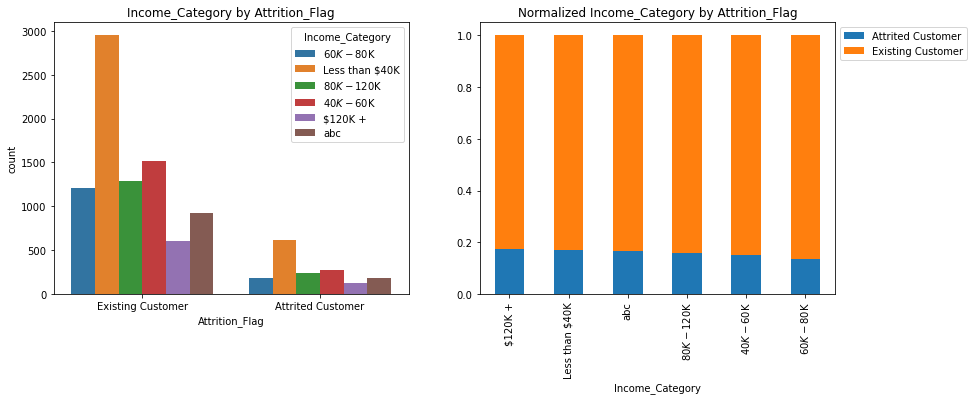

In [42]:
count_and_normalize_plot(data, 'Income_Category', 'Attrition_Flag')

Attrition_Flag            Attrited Customer  Existing Customer    All
Total_Relationship_Count                                             
All                                    1627               8500  10127
3                                       400               1905   2305
2                                       346                897   1243
1                                       233                677    910
5                                       227               1664   1891
4                                       225               1687   1912
6                                       196               1670   1866
----------------------------------------------------------------------------------------------------


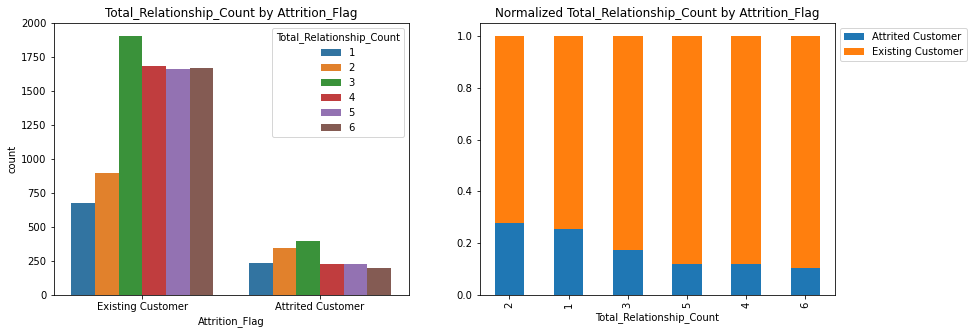

In [43]:
count_and_normalize_plot(data, 'Total_Relationship_Count', 'Attrition_Flag')

Attrition_Flag  Attrited Customer  Existing Customer    All
Card_Category                                              
All                          1627               8500  10127
Blue                         1519               7917   9436
Silver                         82                473    555
Gold                           21                 95    116
Platinum                        5                 15     20
----------------------------------------------------------------------------------------------------


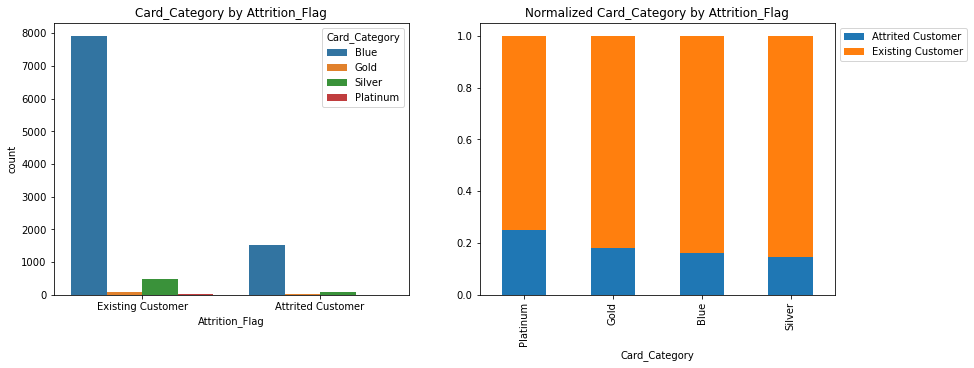

In [44]:
count_and_normalize_plot(data, 'Card_Category', 'Attrition_Flag')

> **Observations:**
> * We do not see any significant pattern of existing and attrited customers with regards to Gender, Dependent_count or Marital_Status. 
> * Marital_Status has some null values and when we replace them with mode then this observation may change.
> * Education_Level: Doctorate and PGs have little higher percentage of attrited customers but number of samples are very less to conclude any pattern.
> * Income_Category: Customer attrition percentage is almost similar for all Income_Category but since a significant number from 'abc' category are attrited customers when we merge this with Less Than 40K group, it will significantly increase the percentage of that category.
> * Total_Relationship_Count: We see a pattern here, customers with lower products like 1 or 2 have attrited more.
> * Card_Category: Platinum card customers have attrited more but again the number of samples for Platinum cards are less than 1% hence we cannot draw any strong conclusion here.

### Correlation between Numerical features

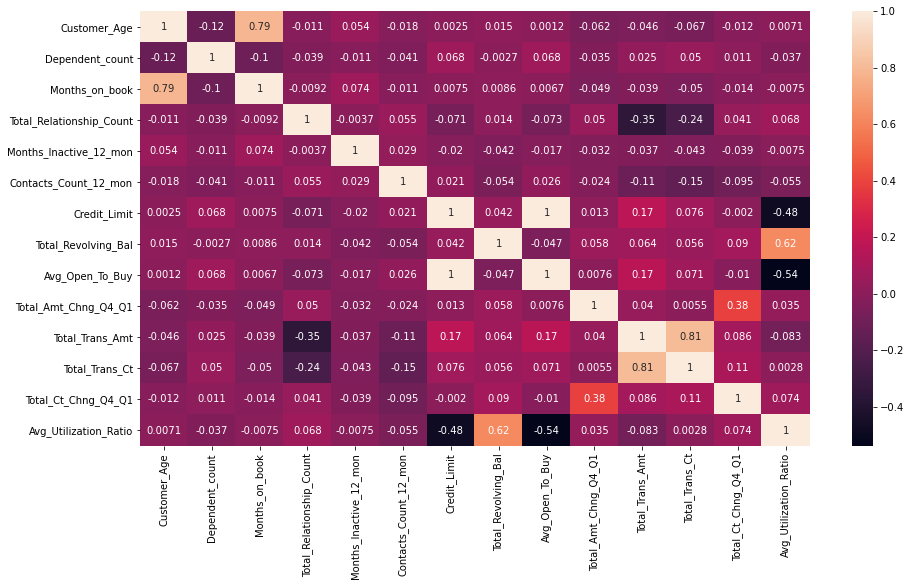

In [45]:
# Check the correlation between features
plt.figure(figsize=(15,8))
sns.heatmap(data.corr(), annot=True);

> **Observations:**
> * *Avg_Open_To_Buy and Credit_Limit* are strongly correlated. During model building we are going to drop Avg_Open_To_Buy. 
> * *Total_Trans_Amt and Total_Trans_Ct* are also higly correlated. Hence Total_Trans_Ct will be dropped.
> * *Total_Amt_Chng_Q4_Q1 and Total_Ct_Chng_Q4_Q1* interestingly are not higly correlated hence we will keep both features. 
> * *Customer_Age and Months_on_book* are highly correlated as well.
> * *Total_Revolving_Bal and Avg_Utilization_Ratio* are also correlated.
> * *Credit_Limit and Avg_Utilization_Ratio* have a negative correlation, which means customers with higher credit limit has lower average utilization. Like Credit_limit same observation can be made on Avg_Open_To_Buy with regards to Avg_Utilization_Ratio. 
> * *Total_Relationship_Count* has negative correlation with *Total_Trans_Amt and Total_Trans_Ct*.
> * Rest of the feaures do not show any significant correlation.

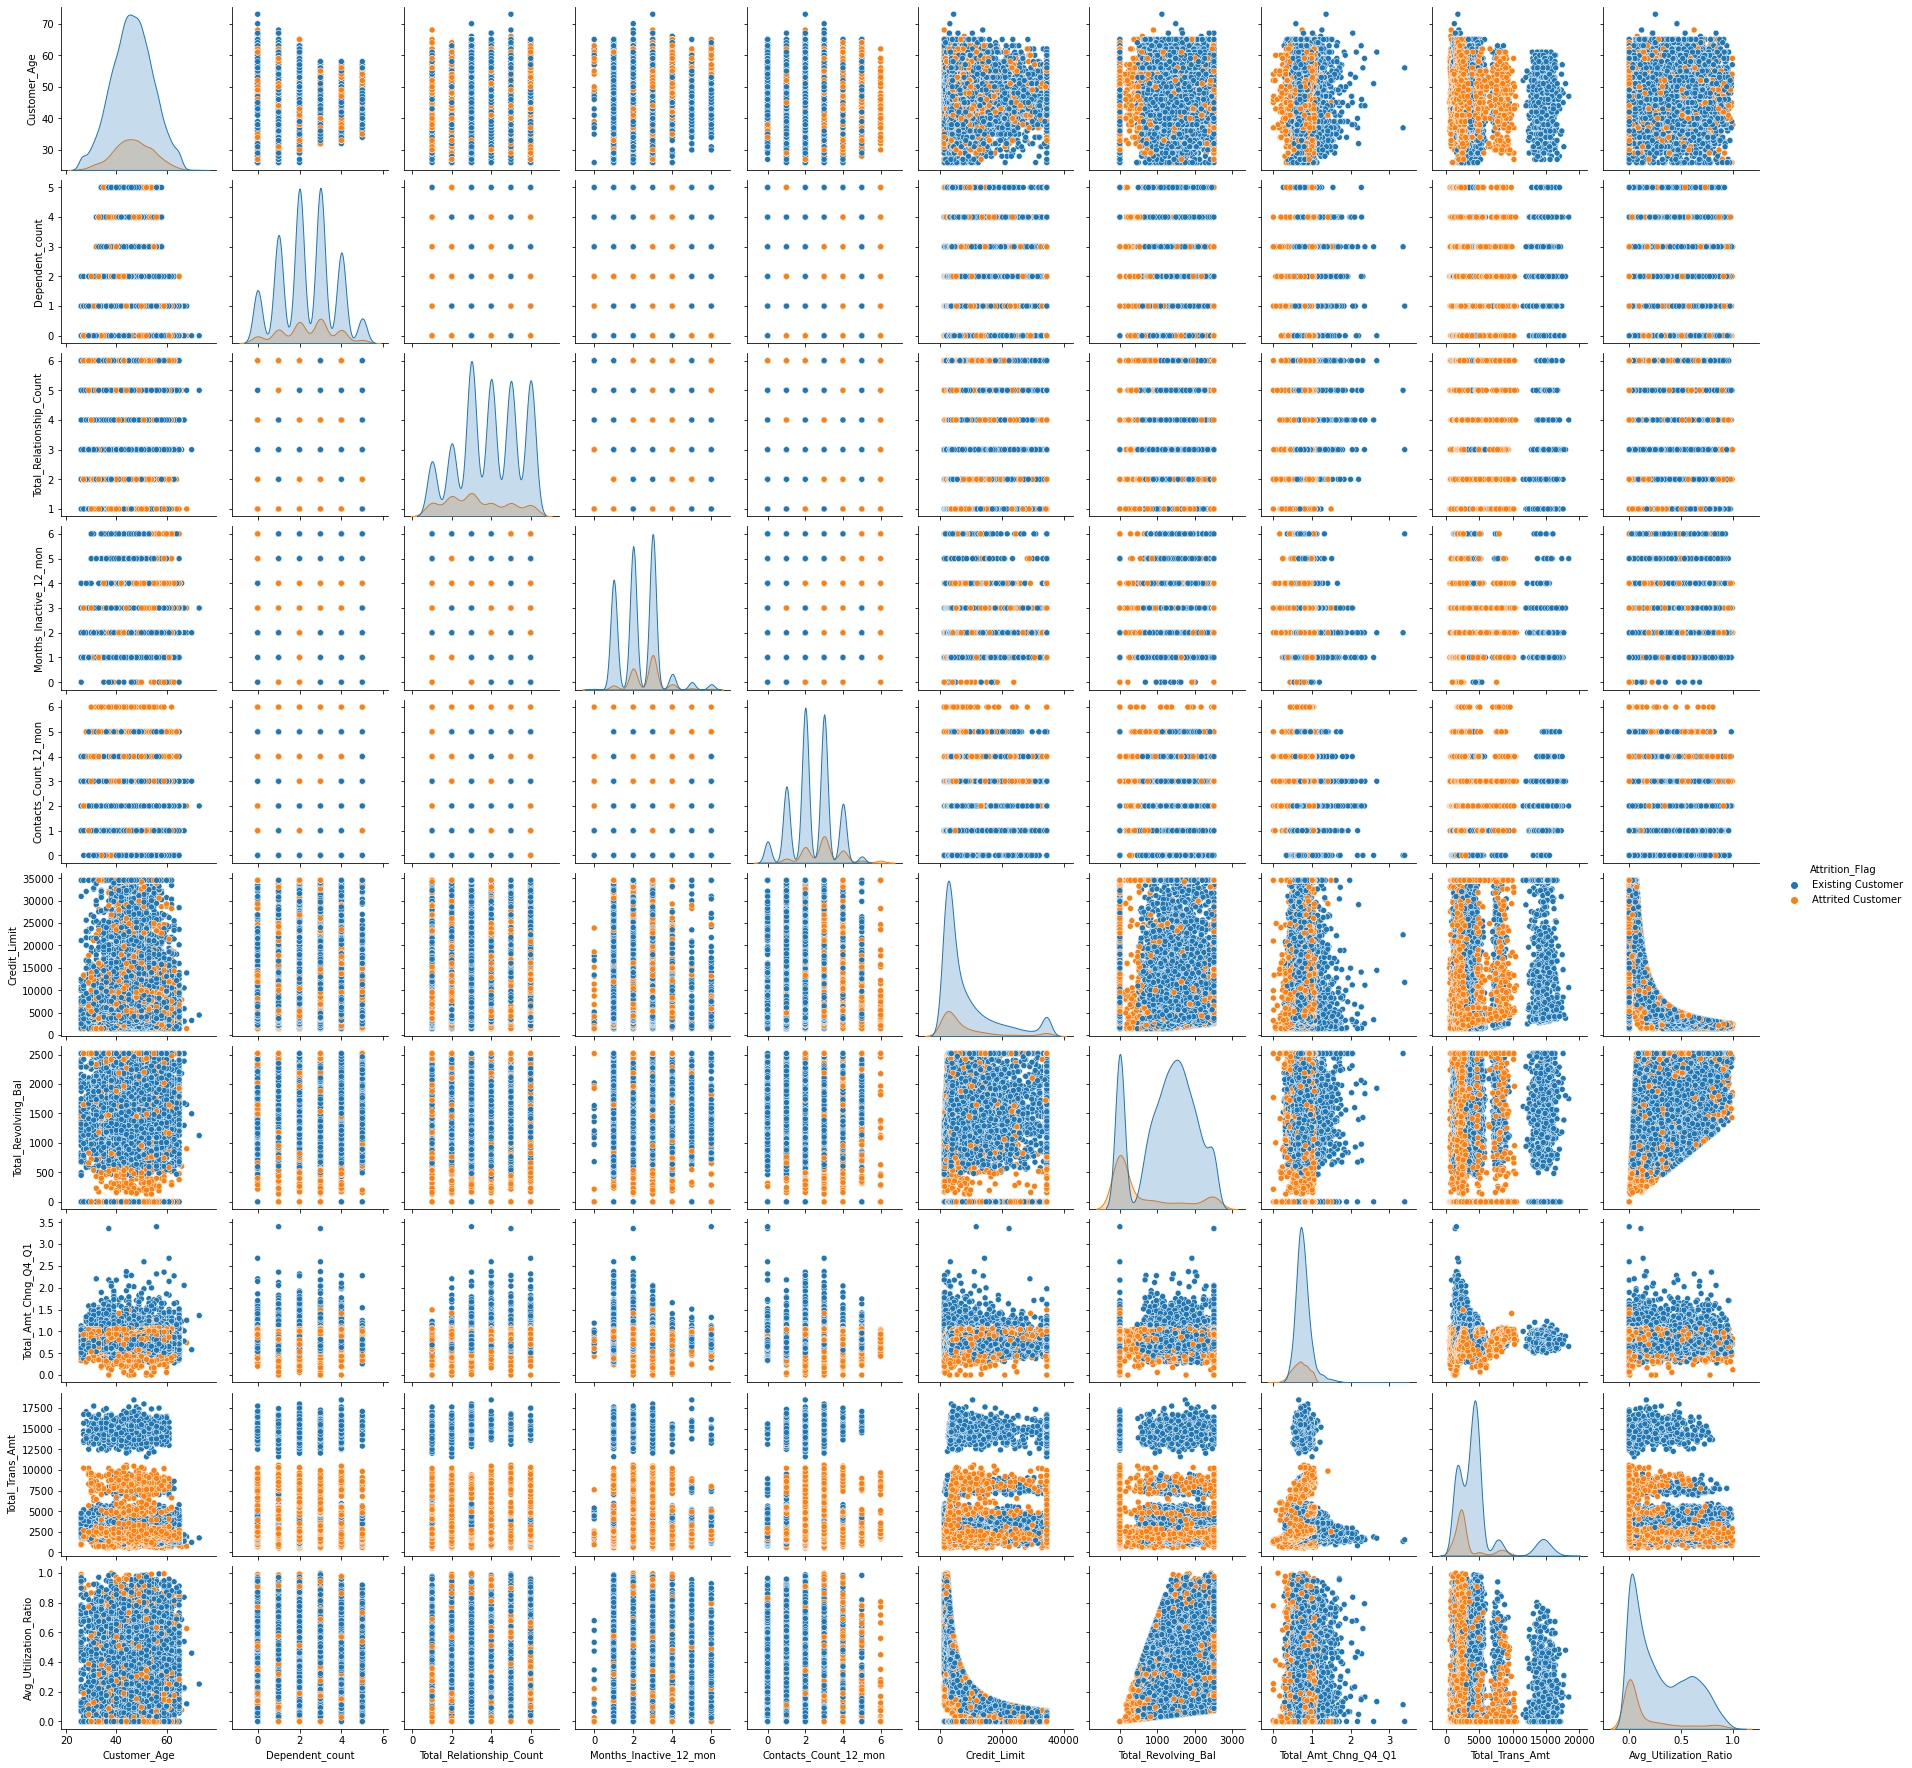

In [46]:
# Let us see the pairplot for important numerical variables, we drop unnecessary features to have better pairplot
pair_plot_data = data.copy()
pair_plot_data.drop(["Avg_Open_To_Buy", "Total_Trans_Ct", "Total_Ct_Chng_Q4_Q1", "Months_on_book"], axis=1, inplace=True)
sns.pairplot(pair_plot_data, hue='Attrition_Flag');

The above pairplots show some interesting patterns and we see that attrited customers have taken distinct spaces in some pairplots. Lets elaborate them further in the below charts.

### Relation of Total_Trans_Amt with Customer_Age and Gender

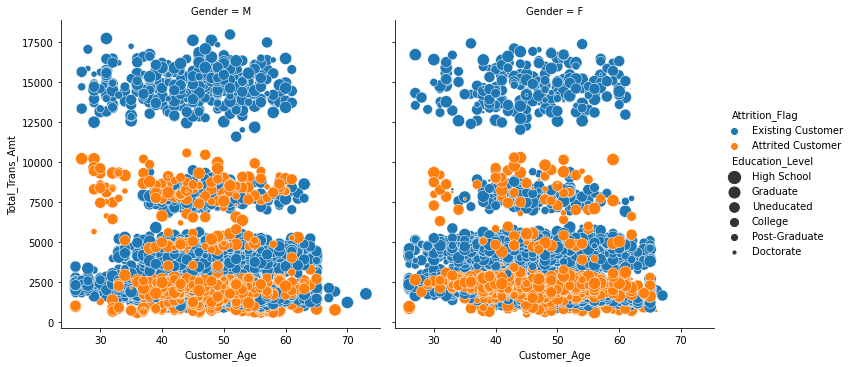

In [47]:
sns.relplot(data=data, x='Customer_Age', y='Total_Trans_Amt', col='Gender', hue='Attrition_Flag', size='Education_Level', sizes=(10, 150));

> **Observations:**
> * Total_Trans_Amt seems to be an important feature. And we clearly see four layered cake pattern in the data with respect to Total_Trans_Amt. It appears that the dataset is composed of multiple datasets based on Total_Trans_Amt.
> * Regardless of Age, Gender and Education, no customer has attrited who has Total_Trans_Amt above 12000.
> * High concentration of attrited customers are seen below 3000 Total_Trans_Amt and between 4500 to 11000 Total_Trans_Amt.
> * Classification models would probably give very high importance to this feature.

### Relation of Total_Revolving_Bal with Customer_Age and Gender

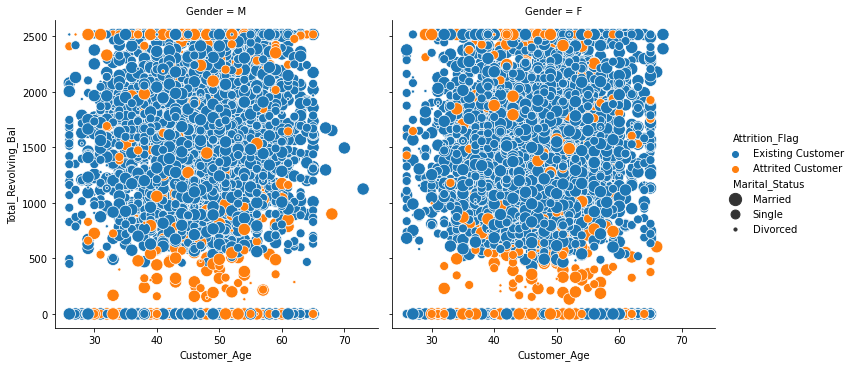

In [48]:
sns.relplot(data=data, x='Customer_Age', y='Total_Revolving_Bal', col='Gender', hue='Attrition_Flag', size='Marital_Status', sizes=(10, 150));

> **Observations:**
> * Again we see high concentration of Attrited customers where Total_Revolving_Bal is lower than 700.
> * It appears that Total_Revolving_Bal will be an important feture in classification models.

### Relation of Avg_Utilization_Ratio with Total_Trans_Amt and Marital_Status

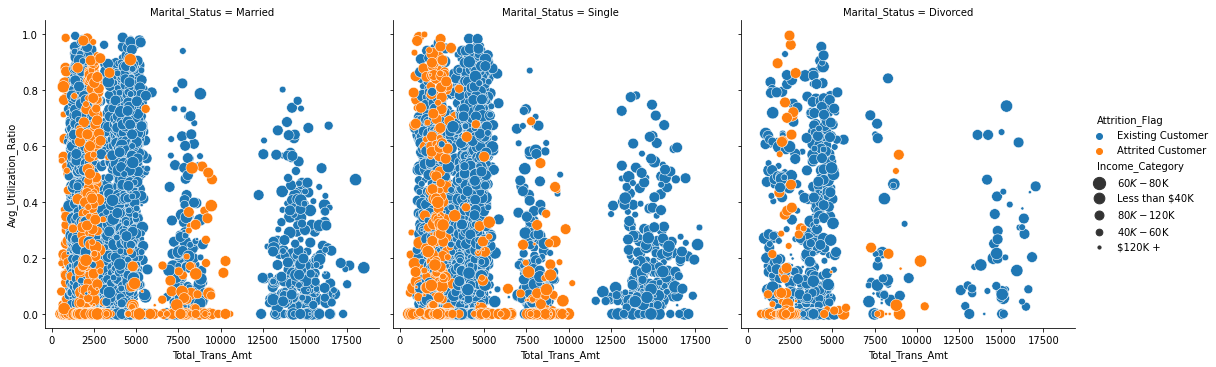

In [49]:
sns.relplot(data=data[data['Income_Category'] != 'abc'], x='Total_Trans_Amt', y='Avg_Utilization_Ratio', col='Marital_Status', hue='Attrition_Flag', size='Income_Category', sizes=(10, 150));

> **Observations:**
> * We see that majority of attrited customers are clustered below 3000 Total_Trans_Amt and towards the lower Avg_Utilization_Ratio.
> * A similar second cluster of attrited customers is seen between 7000 to 11000 Total_Trans_Amt and lower Avg_Utilization_Ratio
> * There is also a small cluster of attrited customers around 4000 to 7000 of Total_Trans_Amt and very low Avg_Utilization_Ratio.
> * We expect to see Avg_Utilization_Ratio to be an important feture in classification models.

### Relation of Total_Amt_Chng_Q4_Q1 with Total_Ct_Chng_Q4_Q1 and Income_Category

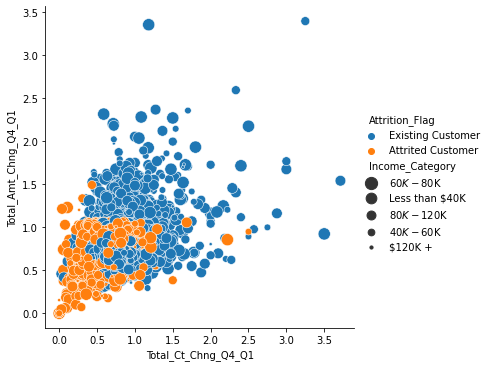

In [50]:
sns.relplot(data=data[data['Income_Category'] != 'abc'], x='Total_Ct_Chng_Q4_Q1', y='Total_Amt_Chng_Q4_Q1', hue='Attrition_Flag', size='Income_Category', sizes=(10, 150));

> **Observations:**
> * Majority of attrited customers are concentrated within 1.0 of Total_Ct_Chng_Q4_Q1 and Total_Amt_Chng_Q4_Q1.
> * We expect to see Total_Ct_Chng_Q4_Q1 and Total_Amt_Chng_Q4_Q1 to be important fetures in classification models.

## Feature Engineering and Missing Value Treatment

### Custom Transformers

We noticed that there are certain columns which contains redundant or irrelvant information. We would like to drop these columns as part of pre-processing. In order to drop columns using pipeline later, let's write a custom transformer.

In [51]:
from sklearn.base import BaseEstimator, TransformerMixin

class DropColumns(BaseEstimator, TransformerMixin):
    """
    Custom Transformer to drop columns from a dataset as part of pre-processing.
    """ 
    def __init__(self, cols):
        if not isinstance(cols, list):
            self.cols = [cols]
        else:
            self.cols = cols

    def fit(self, X: pd.DataFrame, y: pd.Series):
        # there is nothing to fit
        return self

    def transform(self, X:pd.DataFrame):
        X.drop(self.cols, axis=1, inplace=True)
        return X

In [52]:
# Test the DropColumns transformer using a test data frame.
TestDF = pd.DataFrame([[0., 1., 2., 2., "one"], [1., 1., 0., 1., "zero"]]) 
TestDF.columns = ["a", "b", "c", "d", "e"] 
X = TestDF.drop("e", axis=1)
y = TestDF["e"]

In [53]:
drop_cols = DropColumns(["a", "b"])
drop_cols.fit_transform(X, y)

c    d
0  2.0  2.0
1  0.0  1.0

We also need to replace Target variable values to 1 and 0 integer datatype from Object/String data type for machine learning models. Again we are going to write a custom transformer for this purpose as later we can use the same in pipeline building.

In [54]:
class ReplaceTargetValues(BaseEstimator, TransformerMixin):
    """
    Custom Transformer replace target column values based on a map.
    """ 
    def __init__(self, _map):
       self._map = _map

    def fit(self, X: pd.DataFrame, y: pd.Series):
        y.replace(self._map, inplace=True)
        return self

    def transform(self, X:pd.DataFrame):
        # there is nothing to tranform
        return X

In [55]:
# Init with a test map
rep_tgt_vals = ReplaceTargetValues({"one": 1, "zero": 0})

In [56]:
# Test on the test dataframe
rep_tgt_vals.fit_transform(X, y);

In [57]:
# Check the target values to see the result of the transformation
print(y)

0    1
1    0
Name: e, dtype: int64


### Apply Transformations to Original Dataset

In [58]:
# To be used for missing value imputation
from sklearn.impute import SimpleImputer

# Split data to Train, Validation and Test sets
from sklearn.model_selection import train_test_split

# To be used for data scaling
from sklearn.preprocessing import StandardScaler

In [59]:
# Take a copy of the original dataset from the CSV file
data = df.copy()

In [60]:
features = data.drop('Attrition_Flag', axis=1)
target = data['Attrition_Flag']

In [61]:
# Initialize Target Replace Transformer
rep_tgt_vals = ReplaceTargetValues({"Attrited Customer": 1, "Existing Customer": 0})

In [62]:
rep_tgt_vals.fit_transform(features, target);

#### Below columns can be dropped without loosing much information for the Model building purpose.
> * *CLIENTNUM*: Does not contain any useful information.
> * *Avg_Open_To_Buy*: Strong correlation with Credit_Limit
> * *Total_Trans_Ct*: High correlation with Total_Trans_Amt

In [63]:
# Initialize DropColumns Transformer
drop_cols = DropColumns(["CLIENTNUM", "Avg_Open_To_Buy", "Total_Trans_Ct"])
drop_cols.fit_transform(features, target);

In [64]:
# Check the shape of the feaures
features.shape

(10127, 17)

In [65]:
# Check the shape of the target
target.shape

(10127,)

#### Split data to train, validation and test sets

Before applying other transformation we need to split the data into train, validation and test sets. This will ensure no data leakage from test and validation sets to training data.

In [66]:
# Splitting data into training, validation and test sets:
# first we split data into 2 parts, say temporary and test
X_temp, X_test, y_temp, y_test = train_test_split(
    features, target, test_size=0.2, random_state=1, stratify=target
)

# then we split the temporary set into train and validation
X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=0.25, random_state=1, stratify=y_temp
)
print(X_train.shape, X_val.shape, X_test.shape)

(6075, 17) (2026, 17) (2026, 17)


### Impute Missing Values - Education_Level and Marital_Status

In [67]:
# Let's impute the missing values
imp_mode_nan = SimpleImputer(missing_values=np.nan, strategy="most_frequent")
cols_to_impute = ["Education_Level", "Marital_Status"]

# fit and transform the imputer on train data
X_train[cols_to_impute] = imp_mode_nan.fit_transform(X_train[cols_to_impute])

# Transform on validation and test data
X_val[cols_to_impute] = imp_mode_nan.transform(X_val[cols_to_impute])

# fit and transform the imputer on test data
X_test[cols_to_impute] = imp_mode_nan.transform(X_test[cols_to_impute])

### Impute Missing Values - Income_Category

Income_Category 'abc' will be treated as missing value and will be replaced with mode value.
During pipeline building we will use another methond using FunctionTransformer to imput this feature.

In [68]:
imp_mode_abc = SimpleImputer(missing_values='abc', strategy="most_frequent")
cols_to_impute = ["Income_Category"]

# fit and transform the imputer on train data
X_train[cols_to_impute] = imp_mode_abc.fit_transform(X_train[cols_to_impute])

# Transform on validation and test data
X_val[cols_to_impute] = imp_mode_abc.transform(X_val[cols_to_impute])

# fit and transform the imputer on test data
X_test[cols_to_impute] = imp_mode_abc.transform(X_test[cols_to_impute])

In [69]:
X_train["Income_Category"].value_counts()

Less than $40K    2783
$40K - $60K       1059
$80K - $120K       953
$60K - $80K        831
$120K +            449
Name: Income_Category, dtype: int64

In [70]:
# Creating dummy variables for categorical variables
X_train = pd.get_dummies(data=X_train, drop_first=True)
X_val = pd.get_dummies(data=X_val, drop_first=True)
X_test = pd.get_dummies(data=X_test, drop_first=True)

In [71]:
# Apply Standard Scaler to high value columns
std_scaler = StandardScaler()
cols_to_std = ["Credit_Limit", "Total_Revolving_Bal", "Total_Trans_Amt"]
# fit and transform the imputer on train data
X_train[cols_to_std] = std_scaler.fit_transform(X_train[cols_to_std])

# Transform on validation and test data
X_val[cols_to_std] = std_scaler.transform(X_val[cols_to_std])

# fit and transform the imputer on test data
X_test[cols_to_std] = std_scaler.transform(X_test[cols_to_std])

In [72]:
# Take a look at the X_train dataset
X_train.head()

Customer_Age  Dependent_count  Months_on_book  Total_Relationship_Count  \
800             40                2              21                         6   
498             44                1              34                         6   
4356            48                4              36                         5   
407             41                2              36                         6   
8728            46                4              36                         2   

      Months_Inactive_12_mon  Contacts_Count_12_mon  Credit_Limit  \
800                        4                      3      1.253651   
498                        2                      0     -0.632908   
4356                       1                      2     -0.202991   
407                        2                      0      2.016580   
8728                       2                      3      0.701889   

      Total_Revolving_Bal  Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  \
800              0.514966                 0.466        -0.796577   
498              0.873796                 0.387        -0.891048   
4356             1.635543                 0.873        -0.019624   
407             -1.446963                 0.610        -0.937253   
8728             0.213696                 0.754         0.983941   

      Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  Gender_M  \
800                 0.533                  0.080         1   
498                 0.632                  0.657         1   
4356                0.881                  0.370         1   
407                 0.300                  0.000         1   
8728                0.750                  0.090         1   

      Education_Level_Doctorate  Education_Level_Graduate  \
800                           0                         1   
498                           0                         1   
4356                          0                         0   
407                           0                         1   
8728                          0                         0   

      Education_Level_High School  Education_Level_Post-Graduate  \
800                             0                              0   
498                             0                              0   
4356                            1                              0   
407                             0                              0   
8728                            1                              0   

      Education_Level_Uneducated  Marital_Status_Married  \
800                            0                       0   
498                            0                       1   
4356                           0                       1   
407                            0                       1   
8728                           0                       0   

      Marital_Status_Single  Income_Category_$40K - $60K  \
800                       1                            0   
498                       0                            0   
4356                      0                            0   
407                       0                            0   
8728                      0                            1   

      Income_Category_$60K - $80K  Income_Category_$80K - $120K  \
800                             0                             0   
498                             0                             0   
4356                            0                             1   
407                             1                             0   
8728                            0                             0   

      Income_Category_Less than $40K  Card_Category_Gold  \
800                                0                   0   
498                                1                   0   
4356                               0                   0   
407                                0                   0   
8728                               0                   0   

      Card_Category_Platinum  Card_Category_Silver  
800    

## Model Building

We are going to now build several classification models and evalute their performance based on training, validation and test sets. At the end we'll pick the best model, build a production pipeline and provide recommendations for **"The Thera bank"** credit card department. We are going to follow below steps:

1. Build 6 models with original data
2. Build 6 models with oversampled data
3. Build 6 models with undersampled data
4. Choose 3 best models among 18 models built in the previous 3 steps
5. Tune 3 models
6. Choose one best model and productionize it using pipelines

### Model evaluation criterion:

### Model can make wrong predictions as:
1. Predicting a person who has churned or attrited but in reality he/she did not.
2. Predicting a person who has not churned or attrited but in reality he/she did.

### Which case is more important? 

* Predicting a person who has churned or attrited but in reality he/she did not then the company has nothing to loose financially but these false positives need to be minimized to reduce noise. 

* If we predict a customer who did not churned or attrited but in reality he/she did then it will be a loss of oppertunity for the company and this is precisely we want to avoid since we want to retain these customers. So reducing false negatives are more important in this business scenario.


### How to reduce this loss i.e need to reduce False Negatives?
*  `Recall` should be maximized, the greater the `Recall` higher the chances of identifying customers who would likely to churn or attrite.

#### Import necessary libraries for model building

In [73]:
# To help with model building
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    AdaBoostClassifier,
    GradientBoostingClassifier,
    RandomForestClassifier,
    BaggingClassifier,
)
from xgboost import XGBClassifier

# To oversample and undersample data
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

# To get different metric scores, and split data
from sklearn import metrics
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    plot_confusion_matrix,
)

# To be used for data scaling and one hot encoding
from sklearn.preprocessing import OneHotEncoder, FunctionTransformer

# To be used for tuning the model
from sklearn.model_selection import RandomizedSearchCV

# To be used for creating pipelines and personalizing them
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

### Build 6 models with original data

Build six different models with default settings and use cross validation to get average performance of the models

In [74]:
models = []  # Empty list to store all the models

# Appending models into the list
models.append(("Default Bagging", BaggingClassifier(random_state=1)))
models.append(("Default RandomForest", RandomForestClassifier(random_state=1)))
models.append(("Default GradientBoosting", GradientBoostingClassifier(random_state=1)))
models.append(("Default AdaBoost", AdaBoostClassifier(random_state=1)))
models.append(("Default XGB", XGBClassifier(random_state=1, eval_metric="logloss")))
models.append(("Default DecisionTree", DecisionTreeClassifier(random_state=1)))

results = []  # Empty list to store all model's CV scores
names = []  # Empty list to store name of the models

# loop through all models to get the mean cross validated score
print("\n" "Cross-Validation Performance [Default]:" "\n")
for name, model in models:
    scoring = "recall"
    kfold = StratifiedKFold(
        n_splits=5, shuffle=True, random_state=1
    )  # Setting number of splits equal to 5
    cv_result = cross_val_score(
        estimator=model, X=X_train, y=y_train, scoring=scoring, cv=kfold
    )
    results.append(cv_result)
    names.append(name)
    print("{}: {}".format(name, round(cv_result.mean(), 2)))


Cross-Validation Performance [Default]:

Default Bagging: 0.72
Default RandomForest: 0.68
Default GradientBoosting: 0.76
Default AdaBoost: 0.73
Default XGB: 0.82
Default DecisionTree: 0.73


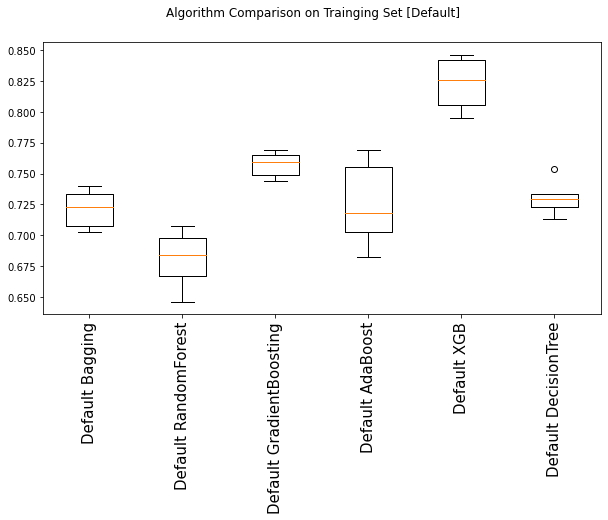

In [75]:
# Plotting boxplots for CV scores of all models defined above
fig = plt.figure(figsize=(10,5))

fig.suptitle("Algorithm Comparison on Trainging Set [Default]")
ax = fig.add_subplot(111)

plt.boxplot(results)
plt.xticks(rotation=90, fontsize=15)
ax.set_xticklabels(names)

plt.show()

#### Check the performance on Validation set

In [76]:
print("Validation Performance [Default]:" "\n")
score = []
for name, model in models:
    model.fit(X_train, y_train)
    scores = recall_score(y_val, model.predict(X_val))
    score.append(scores)
    print("{}: {}".format(name, round(scores, 2)))

Validation Performance [Default]:

Default Bagging: 0.8
Default RandomForest: 0.75
Default GradientBoosting: 0.83
Default AdaBoost: 0.77
Default XGB: 0.88
Default DecisionTree: 0.78


> **Observations:**
> * Default XGBoost classifier is giving a good performance followed by GradientBoostClassifier on validation set.
> * Performance of the models in Validation set is slightly better than training set.
> * Cross Validation is helping models not to overfit.

### Build 6 models with oversampled data

In [77]:
print("Before UpSampling, counts of label 'Yes': {}".format(sum(y_train == 1)))
print("Before UpSampling, counts of label 'No': {} \n".format(sum(y_train == 0)))

# Use SMOTE from imblearn lib to oversample the training data
sm = SMOTE(
    sampling_strategy=1, k_neighbors=5, random_state=1
)  # Synthetic Minority Over Sampling Technique
X_train_over, y_train_over = sm.fit_resample(X_train, y_train)


print("After UpSampling, counts of label 'Yes': {}".format(sum(y_train_over == 1)))
print("After UpSampling, counts of label 'No': {} \n".format(sum(y_train_over == 0)))


print("After UpSampling, the shape of train_X: {}".format(X_train_over.shape))
print("After UpSampling, the shape of train_y: {} \n".format(y_train_over.shape))

Before UpSampling, counts of label 'Yes': 976
Before UpSampling, counts of label 'No': 5099 

After UpSampling, counts of label 'Yes': 5099
After UpSampling, counts of label 'No': 5099 

After UpSampling, the shape of train_X: (10198, 27)
After UpSampling, the shape of train_y: (10198,) 



Notice that after oversampling Attrited Customers datapoints in Training set has increased from 976 to 5099.

In [78]:
over_models = []  # Empty list to store all the models

# Appending models into the list
over_models.append(("Over Bagging", BaggingClassifier(random_state=1)))
over_models.append(("Over RandomForest", RandomForestClassifier(random_state=1)))
over_models.append(("Over GradientBoosting", GradientBoostingClassifier(random_state=1)))
over_models.append(("Over AdaBoost", AdaBoostClassifier(random_state=1)))
over_models.append(("Over XGB", XGBClassifier(random_state=1, eval_metric="logloss")))
over_models.append(("Over DecisionTree", DecisionTreeClassifier(random_state=1)))

over_results = []  # Empty list to store all model's CV scores
over_names = []  # Empty list to store name of the models

# loop through all models to get the mean cross validated score
print("\n" "Cross-Validation Performance: [Over Sampling]" "\n")
for name, model in over_models:
    scoring = "recall"
    kfold = StratifiedKFold(
        n_splits=5, shuffle=True, random_state=1
    )  # Setting number of splits equal to 5
    cv_result = cross_val_score(
        estimator=model, X=X_train_over, y=y_train_over, scoring=scoring, cv=kfold
    )
    over_results.append(cv_result)
    over_names.append(name)
    print("{}: {}".format(name, round(cv_result.mean(),2)))


Cross-Validation Performance: [Over Sampling]

Over Bagging: 0.92
Over RandomForest: 0.95
Over GradientBoosting: 0.94
Over AdaBoost: 0.92
Over XGB: 0.97
Over DecisionTree: 0.92


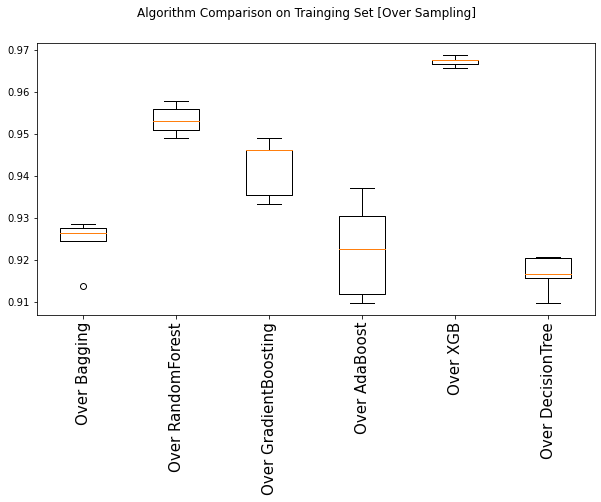

In [79]:
# Plotting boxplots for CV scores of all models defined above
fig = plt.figure(figsize=(10,5))

fig.suptitle("Algorithm Comparison on Trainging Set [Over Sampling]")
ax = fig.add_subplot(111)

plt.boxplot(over_results)
plt.xticks(rotation=90, fontsize=15)
ax.set_xticklabels(over_names)

plt.show()

#### Check the performance on Validation set

In [80]:
print("Validation Performance: [Over Sampling]" "\n")
over_score = []
for name, model in over_models:
    model.fit(X_train_over, y_train_over)
    scores = recall_score(y_val, model.predict(X_val))
    over_score.append(scores)
    print("{}: {}".format(name, round(scores, 2)))

Validation Performance: [Over Sampling]

Over Bagging: 0.84
Over RandomForest: 0.85
Over GradientBoosting: 0.87
Over AdaBoost: 0.83
Over XGB: 0.86
Over DecisionTree: 0.81


> **Observations:**
> * With oversampled synthetic data, models have overfitted in the training set. All models are giving recall score above 0.92 but on validation set we do not see such high recall scores.
> * On Validation set GradientBoosting, XGB and RandomForest have given good performance.
> * Performance of the oversampled models in Validation set is slightly better than models trained on original data.

### Build 6 models with undersampled data

In [81]:
# Use RandomUnderSampler from imblearn lib to undersample the training data
rus = RandomUnderSampler(random_state=1)
X_train_un, y_train_un = rus.fit_resample(X_train, y_train)

In [82]:
print("Before Under Sampling, counts of label 'Yes': {}".format(sum(y_train == 1)))
print("Before Under Sampling, counts of label 'No': {} \n".format(sum(y_train == 0)))

print("After Under Sampling, counts of label 'Yes': {}".format(sum(y_train_un == 1)))
print("After Under Sampling, counts of label 'No': {} \n".format(sum(y_train_un == 0)))

print("After Under Sampling, the shape of train_X: {}".format(X_train_un.shape))
print("After Under Sampling, the shape of train_y: {} \n".format(y_train_un.shape))

Before Under Sampling, counts of label 'Yes': 976
Before Under Sampling, counts of label 'No': 5099 

After Under Sampling, counts of label 'Yes': 976
After Under Sampling, counts of label 'No': 976 

After Under Sampling, the shape of train_X: (1952, 27)
After Under Sampling, the shape of train_y: (1952,) 



Notice that after undersampling Existing Customers datapoints in Training set has decreased from 5099 to 976.

In [83]:
un_models = []  # Empty list to store all the models

# Appending models into the list
un_models.append(("Under Bagging", BaggingClassifier(random_state=1)))
un_models.append(("Under RandomForest", RandomForestClassifier(random_state=1)))
un_models.append(("Under GradientBoosting", GradientBoostingClassifier(random_state=1)))
un_models.append(("Under AdaBoost", AdaBoostClassifier(random_state=1)))
un_models.append(("Under XGB", XGBClassifier(random_state=1, eval_metric="logloss")))
un_models.append(("Under DecisionTree", DecisionTreeClassifier(random_state=1)))

un_results = []  # Empty list to store all model's CV scores
un_names = []  # Empty list to store name of the models

# loop through all models to get the mean cross validated score
print("\n" "Cross-Validation Performance: [Under Sampling]" "\n")
for name, model in un_models:
    scoring = "recall"
    kfold = StratifiedKFold(
        n_splits=5, shuffle=True, random_state=1
    )  # Setting number of splits equal to 5
    cv_result = cross_val_score(
        estimator=model, X=X_train_un, y=y_train_un, scoring=scoring, cv=kfold
    )
    un_results.append(cv_result)
    un_names.append(name)
    print("{}: {}".format(name, round(cv_result.mean(), 2)))


Cross-Validation Performance: [Under Sampling]

Under Bagging: 0.9
Under RandomForest: 0.9
Under GradientBoosting: 0.93
Under AdaBoost: 0.89
Under XGB: 0.93
Under DecisionTree: 0.88


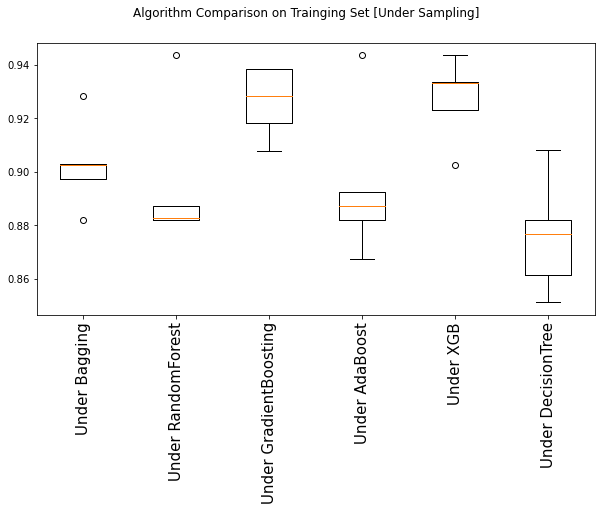

In [84]:
# Plotting boxplots for CV scores of all models defined above
fig = plt.figure(figsize=(10,5))

fig.suptitle("Algorithm Comparison on Trainging Set [Under Sampling]")
ax = fig.add_subplot(111)

plt.boxplot(un_results)
plt.xticks(rotation=90, fontsize=15)
ax.set_xticklabels(un_names)

plt.show()

#### Check the performance on Validation set

In [85]:
print("Validation Performance: [Under Sampling]" "\n")
un_score = []
for name, model in un_models:
    model.fit(X_train_un, y_train_un)
    scores = recall_score(y_val, model.predict(X_val))
    un_score.append(scores)
    print("{}: {}".format(name, round(scores, 2)))

Validation Performance: [Under Sampling]

Under Bagging: 0.93
Under RandomForest: 0.9
Under GradientBoosting: 0.94
Under AdaBoost: 0.92
Under XGB: 0.94
Under DecisionTree: 0.89


> **Observations:**
> * In case of undersampling we noticed that models are giving similar perfromance on Training and Validation sets.
> * XGBoost and GradientBoosting are giving similar performance and other models are not too behind.
> * Models are not overfitted when trained with undersampled data.

### Choose 3 best models among 18 models built in the previous 3 steps

In [86]:
model_scores = pd.DataFrame({'Model': names + over_names + un_names, 'Score': score + over_score + un_score})

In [87]:
model_scores.sort_values(by='Score', ascending=False)

Model     Score
14    Under GradientBoosting  0.941718
16                 Under XGB  0.938650
12             Under Bagging  0.926380
15            Under AdaBoost  0.917178
13        Under RandomForest  0.901840
17        Under DecisionTree  0.892638
4                Default XGB  0.877301
8      Over GradientBoosting  0.871166
10                  Over XGB  0.861963
7          Over RandomForest  0.846626
6               Over Bagging  0.837423
9              Over AdaBoost  0.834356
2   Default GradientBoosting  0.834356
11         Over DecisionTree  0.812883
0            Default Bagging  0.803681
5       Default DecisionTree  0.776074
3           Default AdaBoost  0.769939
1       Default RandomForest  0.751534

Based on the recall score performance top 3 models are:

1. Undersampled GradientBoosting Classifier
2. Undersampled XGBoost Classifier
3. Undersampled Bagging Classifier

Let's check what are the most important features from GradientBoosting and XGBoost classifiers:

In [88]:
def show_feature_imp(model):
    """
    Show feature importance from a decision tree type models
    """
    feature_names = X_train.columns
    importances = model.feature_importances_
    indices = np.argsort(importances)

    plt.figure(figsize=(12,12))
    plt.title('Feature Importances')
    plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
    plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
    plt.xlabel('Relative Importance')
    plt.show()

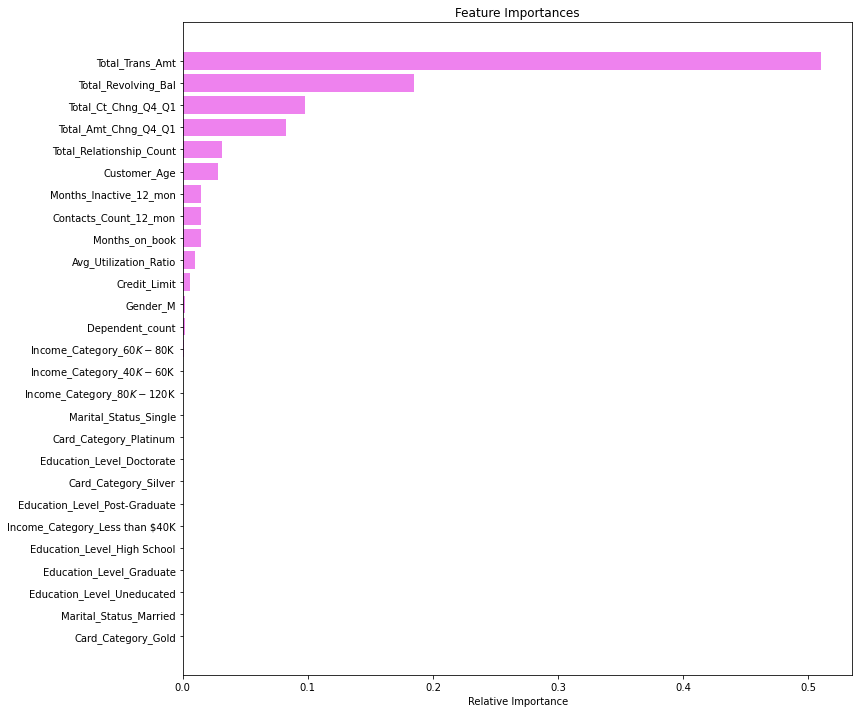

In [89]:
# Important features for UnderSampled GradientBoosting Classifier
show_feature_imp(un_models[2][1])

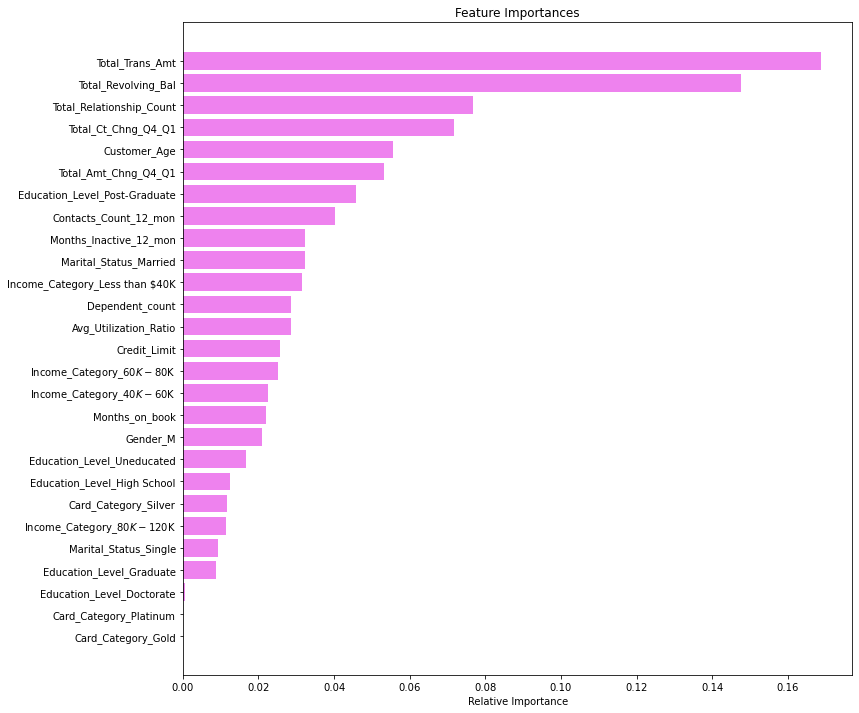

In [90]:
# Important features for UnderSampled XGBoost Classifier
show_feature_imp(un_models[4][1])

> **Observations:**
> * Out of 18 models top 3 models are giving almost similar recall scores 0.93 to 0.94.
> * As expected, all the top models have given very high importance to Total_Trans_Amt
> * The top models also have given high importance to Total_Revolving_Bal, Total_Amt_Chng_Q4_Q1 and Total_Ct_Chng_Q4_Q1
> * Models have given high importance to Total_Relationship_Count, Customer_Age with varing degree of importance.

### Hyperparameter Tuning of top 3 Models
**We will tune the top three models using RandomizedSearchCV method based on the project requirement** Please note GridSearchCV is not used as only RandomizedSearchCV has been asked.

**First let's create two functions to calculate different metrics and confusion matrix, so that we don't have to use the same code repeatedly for each model.**

In [91]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "Accuracy": acc,
            "Recall": recall,
            "Precision": precision,
            "F1": f1,
        },
        index=[0],
    )

    return df_perf

In [92]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

#### 1. Tune the XGBoost Classifier

In [93]:
%%time
# defining model
model = XGBClassifier(random_state=1,eval_metric='logloss')

# Parameter grid to pass in RandomizedSearchCV
param_grid={'n_estimators':np.arange(50,150,50),
            'scale_pos_weight':[2,5,10],
            'learning_rate':[0.01,0.1,0.2,0.05],
            'gamma':[0,1,3,5],
            'subsample':[0.8,0.9,1],
            'max_depth':np.arange(1,5,1),
            'reg_lambda':[5,10]}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
xgb_tuned = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_iter=50, scoring=scorer, cv=5, random_state=1, n_jobs = -1)

#Fitting parameters in RandomizedSearchCV
xgb_tuned.fit(X_train,y_train)

print("Best parameters are {} with CV score={}:" .format(xgb_tuned.best_params_, xgb_tuned.best_score_))

Best parameters are {'subsample': 0.8, 'scale_pos_weight': 10, 'reg_lambda': 5, 'n_estimators': 100, 'max_depth': 3, 'learning_rate': 0.05, 'gamma': 3} with CV score=0.9569649398220827:
CPU times: user 2.92 s, sys: 285 ms, total: 3.21 s
Wall time: 34.6 s


In [94]:
# building model with best parameters
xgb_tuned = XGBClassifier(
    random_state=1,
    n_estimators=100,
    scale_pos_weight=10,
    gamma=3,
    subsample=0.8,
    learning_rate=0.05,
    eval_metric="logloss",
    max_depth=3,
    reg_lambda=5,
)
# Fit the model on training data
xgb_tuned.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              eval_metric='logloss', gamma=3, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.05, max_delta_step=0,
              max_depth=3, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=12,
              num_parallel_tree=1, predictor='auto', random_state=1,
              reg_alpha=0, reg_lambda=5, scale_pos_weight=10, subsample=0.8,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [95]:
# Calculating different metrics on train set
xgboost_random_train = model_performance_classification_sklearn(
    xgb_tuned, X_train, y_train
)
print("Training performance:")
xgboost_random_train

Training performance:


Accuracy    Recall  Precision        F1
0   0.88823  0.981557   0.591723  0.738343

In [96]:
# Calculating different metrics on validation set
xgboost_random_val = model_performance_classification_sklearn(xgb_tuned, X_val, y_val)
print("Validation performance:")
xgboost_random_val

Validation performance:


Accuracy    Recall  Precision        F1
0  0.876604  0.960123   0.569091  0.714612

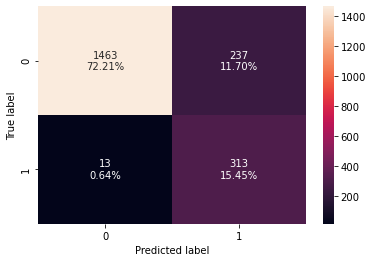

In [97]:
# creating confusion matrix
confusion_matrix_sklearn(xgb_tuned, X_val, y_val)

After tuning, XGBoostClassifier is giving very good performance on the training and validation datasets. The tuned model is giving generalized performance.

#### 2. Tune the GradientBoosting Classifier

In [98]:
# Choose the type of classifier. 
model = GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),random_state=1)

# Grid of parameters to choose from
param_grid = {
    "n_estimators": [100,150,200,250],
    "subsample":[0.8,0.9,1],
    "max_features":[0.7,0.8,0.9,1]
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
gbc_tuned = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_iter=50, scoring=scorer, cv=5, random_state=1, n_jobs = -1)

#Fitting parameters in RandomizedSearchCV
gbc_tuned.fit(X_train,y_train)

print("Best parameters are {} with CV score={}:" .format(gbc_tuned.best_params_, gbc_tuned.best_score_))

Best parameters are {'subsample': 0.8, 'n_estimators': 250, 'max_features': 0.9} with CV score=0.8176242804814233:


In [99]:
gbc_tuned = GradientBoostingClassifier(
    init=AdaBoostClassifier(random_state=1),
    random_state=1,
    subsample=0.8,
    n_estimators=250,
    max_features=0.9
)
# Fit the model on training data
gbc_tuned.fit(X_train, y_train)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           max_features=0.9, n_estimators=250, random_state=1,
                           subsample=0.8)

In [100]:
# Calculating different metrics on train set
gbc_random_train = model_performance_classification_sklearn(
    gbc_tuned, X_train, y_train
)
print("Training performance:")
gbc_random_train

Training performance:


Accuracy    Recall  Precision        F1
0  0.982222  0.922131   0.965665  0.943396

In [101]:
# Calculating different metrics on validation set
gbc_random_val = model_performance_classification_sklearn(gbc_tuned, X_val, y_val)
print("Validation performance:")
gbc_random_val

Validation performance:


Accuracy    Recall  Precision        F1
0  0.965943  0.874233   0.910543  0.892019

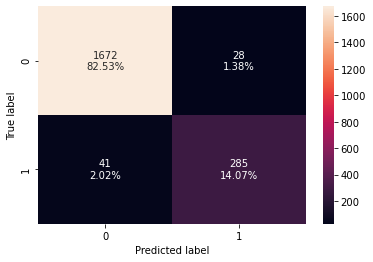

In [102]:
# creating confusion matrix
confusion_matrix_sklearn(gbc_tuned, X_val, y_val)

After tuning, GradientBoostingClassifier is giving very good performance on the train dataset but somewhat low performance on the validation set. 

#### 3. Tune the Bagging Classifier

In [103]:
# Choose the type of classifier. 
model = BaggingClassifier(random_state=1)

# Grid of parameters to choose from
param_grid = {'max_samples': [0.7,0.8,0.9,1], 
              'max_features': [0.7,0.8,0.9,1],
              'n_estimators' : [20,40,80,100],
             }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
bc_tuned = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_iter=50, scoring=scorer, cv=5, random_state=1, n_jobs = -1)

#Fitting parameters in RandomizedSearchCV
bc_tuned.fit(X_train,y_train)

print("Best parameters are {} with CV score={}:" .format(bc_tuned.best_params_, bc_tuned.best_score_))

Best parameters are {'n_estimators': 100, 'max_samples': 0.8, 'max_features': 0.9} with CV score=0.7438252223966509:


In [104]:
bc_tuned=BaggingClassifier(
    random_state=1,
    n_estimators=100,
    max_samples=0.8,
    max_features=0.9
)
# Fit the model on training data
bc_tuned.fit(X_train, y_train)

BaggingClassifier(max_features=0.9, max_samples=0.8, n_estimators=100,
                  random_state=1)

In [105]:
# Calculating different metrics on train set
bc_random_train = model_performance_classification_sklearn(
    bc_tuned, X_train, y_train
)
print("Training performance:")
bc_random_train

Training performance:


Accuracy    Recall  Precision        F1
0  0.999671  0.997951        1.0  0.998974

In [106]:
# Calculating different metrics on validation set
bc_random_val = model_performance_classification_sklearn(bc_tuned, X_val, y_val)
print("Validation performance:")
bc_random_val

Validation performance:


Accuracy    Recall  Precision        F1
0  0.957058  0.819018   0.905085  0.859903

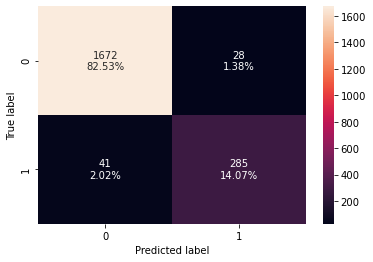

In [107]:
# creating confusion matrix
confusion_matrix_sklearn(gbc_tuned, X_val, y_val)

After tuning, BaggingClassifier is giving very good performance on the train dataset but poor performance on the validation set. The model has overfitted the training data.

#### Compare Training performance of the top 3 tuned models

In [108]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        xgboost_random_train.T,
        gbc_random_train.T,
        bc_random_train.T
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "XGBoost Tuned with Random search",
    "GBC Tuned with Random search",
    "Bagging Tuned with Random search"
]
print("Training performance comparison:")
models_train_comp_df.T.sort_values(by="Recall", ascending=False)

Training performance comparison:


Accuracy    Recall  Precision        F1
Bagging Tuned with Random search  0.999671  0.997951   1.000000  0.998974
XGBoost Tuned with Random search  0.888230  0.981557   0.591723  0.738343
GBC Tuned with Random search      0.982222  0.922131   0.965665  0.943396

#### Compare Validation performance of the top 3 tuned models

In [109]:
# training performance comparison

models_val_comp_df = pd.concat(
    [
        xgboost_random_val.T,
        gbc_random_val.T,
        bc_random_val.T
    ],
    axis=1,
)
models_val_comp_df.columns = [
    "XGBoost Tuned with Random search",
    "GBC Tuned with Random search",
    "Bagging Tuned with Random search"
]
print("Validation performance comparison:")
models_val_comp_df.T.sort_values(by="Recall", ascending=False)

Validation performance comparison:


Accuracy    Recall  Precision        F1
XGBoost Tuned with Random search  0.876604  0.960123   0.569091  0.714612
GBC Tuned with Random search      0.965943  0.874233   0.910543  0.892019
Bagging Tuned with Random search  0.957058  0.819018   0.905085  0.859903

> **Observations:**
> * After hyperparameter tuning, XGBoost classifier has given the top performance for recall score on validation set. And the model is not overfitted.
> * On the other hand, Gradient Boosting and Bagging have very good training performance but somewhat lower performance on validation set. It seems tuned models in this case have actually overfitted the traning data.
> * Based on the analysis so far, we select the **XGBoost tuned model as our final model**.

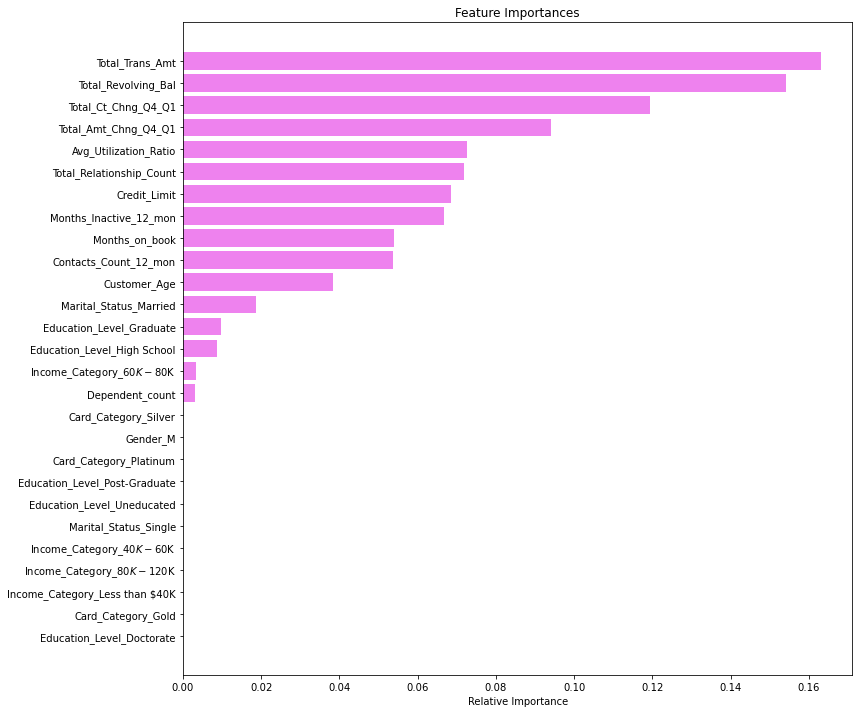

In [110]:
show_feature_imp(xgb_tuned)

> **Observations:**
> * The final XGBoost Tuned model has given highest importance to Total_Trans_Amt.
> * Total_Revolving_Bal, Total_Ct_Chng_Q4_Q1 and Total_Amt_Chng_Q4_Q1 come next in order of importance.
> * Avg_Utilization_Ratio, Total_Relationship_Count, Credit_Limit, Months_Inactive_12_mon are also important features on deciding if a customer is going to close his/her credit card account.

### Performance on Test data of the final tuned model

In [111]:
xgboost_random_test = model_performance_classification_sklearn(xgb_tuned, X_test, y_test)
print("Testing performance:")
xgboost_random_test

Testing performance:


Accuracy    Recall  Precision        F1
0  0.879566  0.966154    0.57404  0.720183

> **Observations:**
> * The final model is performing well on testing data with a recall score close to 0.97.
> * While the accuracy and precision stands at 0.88 and 0.57 respectively.
> * The model is able to idetify the customers who are going to attrite with 97% confidence!
> * The final model is generalized well since training, validation and test performance are close to each other.

## Pipelines for productionizing the model
- Now, we have a final model. let's use pipelines to put the model into production



## Column Transformer
- We know that we can use pipelines to standardize the model building, but the steps in a pipeline are applied to each and every variable - how can we personalize the pipeline to perform different processing on different columns
- Column transformer allows different columns or column subsets of the input to be transformed separately and the features generated by each transformer will be concatenated to form a single feature space. This is useful for heterogeneous or columnar data, to combine several feature extraction mechanisms or transformations into a single transformer.

In [112]:
#Drop unnecessary columns
drop_columns = ["CLIENTNUM", "Avg_Open_To_Buy", "Total_Trans_Ct"]

# Replace Target Values
tgt_replace_map = {"Attrited Customer": 1, "Existing Customer": 0}

# Fix Income_Category 'abc' values
def fix_Income_Category(_dataframe):
    """
    Treat 'abc' as NaN so that Income_Category can be combined with other columns for SimpleImputer 
    """
    _dataframe['Income_Category'] = _dataframe['Income_Category'].apply(lambda x: x if x != 'abc' else np.nan)
    return _dataframe

# Build a FunctionTransformer with above function.
# Similar FunctionTransformer can be written if any specific column values need any apply type transformation
IncomeCategoryTransformer = FunctionTransformer(fix_Income_Category, validate=False)

prepare = Pipeline(steps=[("drop_unnecessary_columns", DropColumns(drop_columns)), 
                          ("map_target_values", ReplaceTargetValues(tgt_replace_map)),
                          ("fix_income_category", IncomeCategoryTransformer)])

# Although we do not have null values in the numerical columns but we would like to impute with 
# median in case any training data comes as null in production. This will safeguard the pipeline.
numerical_features = ["Customer_Age", "Dependent_count", "Months_on_book", "Total_Relationship_Count", 
                      "Months_Inactive_12_mon", "Contacts_Count_12_mon", "Credit_Limit", "Total_Revolving_Bal",
                     "Total_Amt_Chng_Q4_Q1", "Total_Trans_Amt", "Total_Ct_Chng_Q4_Q1", "Avg_Utilization_Ratio"]

# creating a transformer for numerical variables, which will apply simple imputer on the numerical variables
numeric_transformer = Pipeline(steps=[("imputer", SimpleImputer(strategy="median"))])

# creating a list of categorical variables
categorical_features = [
    "Gender",
    "Education_Level",
    "Marital_Status",
    "Income_Category",
    "Card_Category"
]

# creating a transformer for categorical variables, which will first apply simple imputer and
# then do one hot encoding for categorical variables
categorical_transformer = Pipeline(
    steps=[
        ("imputer", SimpleImputer(strategy="most_frequent")),
        ("onehot", OneHotEncoder(handle_unknown="ignore")),
    ]
)

# handle_unknown = "ignore", allows model to handle any unknown category in the test data

# Apply Standard Scaler for high value columns
std_scale_features = ["Credit_Limit", "Total_Revolving_Bal", "Total_Trans_Amt"]

# combining categorical transformer and numerical transformer using a column transformer

preprocessor = ColumnTransformer(
    transformers=[
        ("num_imputer_median", numeric_transformer, numerical_features),
        ("cat_imputer_encoder", categorical_transformer, categorical_features),
        ("std_scaler", StandardScaler(), std_scale_features),
    ],
    remainder="passthrough",
)
# remainder = "passthrough" has been used, it will allow variables that are present in original data
# but not in "numerical_columns" and "categorical_columns" to pass through the column transformer without any changes

In [113]:
# Separating target variable and other variables
data = df.copy()
X = data.drop("Attrition_Flag", axis=1)
Y = data["Attrition_Flag"]

In [114]:
# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.30, random_state=1, stratify=Y
)
print(X_train.shape, X_test.shape)

(7088, 20) (3039, 20)


In [115]:
# Creating new pipeline with best parameters
model = Pipeline(
    steps=[
        ("prepare", prepare),
        ("preprocess", preprocessor),
        ("XGB", XGBClassifier(
                    random_state=1,
                    n_estimators=100,
                    scale_pos_weight=10,
                    gamma=3,
                    subsample=0.8,
                    learning_rate=0.05,
                    eval_metric="logloss",
                    max_depth=3,
                    reg_lambda=5
                ),
        ),
    ]
)
# Fit the model on training data
model.fit(X_train, y_train);

#### Check the steps of the production pipeline

In [116]:
model.steps

[('prepare',
  Pipeline(steps=[('drop_unnecessary_columns',
                   DropColumns(cols=['CLIENTNUM', 'Avg_Open_To_Buy',
                                     'Total_Trans_Ct'])),
                  ('map_target_values',
                   ReplaceTargetValues(_map={'Attrited Customer': 1,
                                             'Existing Customer': 0})),
                  ('fix_income_category',
                   FunctionTransformer(func=<function fix_Income_Category at 0x7ff540714670>))])),
 ('preprocess',
  ColumnTransformer(remainder='passthrough',
                    transformers=[('num_imputer_median',
                                   Pipeline(steps=[('imputer',
                                                    SimpleImputer(strategy='median'))]),
                                   ['Customer_Age', 'Dependent_count',
                                    'Months_on_book', 'Total_Relationship_Count',
                                    'Months_Inactive_12_mon',
      

In [117]:
# Predit using Test dataset
model.predict(X_test)

array([0, 0, 0, ..., 1, 0, 1])

## Conclusions

We have analyzed **The Thera Bank's** Credit Card Users Churn data, build different models using orignal, over sampled and under sampled data. Then we selected the top three models and tuned and finally zeroed on the best model. We have also provided the production pipeline script for training the final model from the original dataset.

While doing the exploratory data analysis and evaluating model outcomes we gathered some valueable insights as below:

Customers can be profiled into three groups:

a) **High Risk Customers**: Having low transaction amount and counts, low total revolving balance, low transaction amout and count ratios between Q4 and Q1, low average credit utilization. These customers across all ages, marital status, gender, education levels are most likely to give up their credit card account.

b) **Medium Risk Customers**: These customers have relatively higher transaction amount and counts, total revolving balance, transaction amout and count ratios between Q4 and Q1 but having low relationship counts, low credit limit, inactive for few months, relatively older customers, married with lower education and income.

c) **Low Risk Customers**: These are good customers for bank and they are not likely to close their accounts. These customers have high transaction amount and counts, high total revolving balance, high transaction amout and count ratios between Q4 and Q1, higher credit limit, have many products with bank, relatively younger customers with high credit limit and higher income.


## Recommendations

Based on the analysis and evidences following recommendations can be offered to the credit card business department in order to stop or reduce customer attrition.

1. Bank needs to find ways to keep customers using their credit card, such that total transaction amount, transactions quarter over quarter, total revolving balance can be increased. Varity of credit card offers related to travel, dinning, entertainment etc. need to be rolled out to its customer base who are profiled as high risk in the previous section.

2. Along with encouraging higher credit card usage, Bank needs to award more credit limit, cross sell other products to improve the relationship counts, rollout special offers for inactive customers and improve customer service to reduce contact points with bank. This will help customers at the borderline to rethink and stay with bank.

3. High end cards are not very popular with customer base based on the given dataset, bank needs to market strategically high end cards to high income and young populations as these group of customers are more likely to stay with bank.

4. On the dataset, it appeared that multiple disparate datasets have been combined to create a large dataset. We may need to analyze the data separately for better prdiction of the customers at risk of closing the account.